# I. Prezentara bazei de date si importarile bibliotecilor necesare

Setul de date **Loan Approval Classification Dataset** a fost preluat de pe [Kaggle](https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data) și conține 45.000 de înregistrări și 14 variabile, fiecare fiind descrisă mai jos:





| Column                          | Description                                                    | Type        |
|---------------------------------|----------------------------------------------------------------|-------------|
| `person_age`                    | Age of the person                                              | Float       |
| `person_gender`                | Gender of the person                                           | Categorical |
| `person_education`            | Highest education level                                        | Categorical |
| `person_income`               | Annual income                                                  | Float       |
| `person_emp_exp`              | Years of employment experience                                 | Integer     |
| `person_home_ownership`       | Home ownership status (e.g., rent, own, mortgage)              | Categorical |
| `loan_amnt`                   | Loan amount requested                                          | Float       |
| `loan_intent`                 | Purpose of the loan                                            | Categorical |
| `loan_int_rate`               | Loan interest rate                                             | Float       |
| `loan_percent_income`        | Loan amount as a percentage of annual income                   | Float       |
| `cb_person_cred_hist_length` | Length of credit history in years                              | Float       |
| `credit_score`               | Credit score of the person                                     | Integer     |
| `previous_loan_defaults_on_file` | Indicator of previous loan defaults                        | Categorical |
| `loan_status` (target variable) | Loan approval status: 1 = approved; 0 = rejected             | Integer     |


Acest set de date a fost creat pentru scopuri multiple precum:


*   **Analiză exploratorie a datelor (EDA)**: Analiza caracteristicile cheie, a tiparelor distribuțiilor și a relațiilor dintre variabile pentru a înțelege factorii de risc de credit.
*   **Clasificare**: Construirea unor modele predictive pentru a clasifica variabila `loan_status` (aprobat / dezaprobat) pentru potențiali solicitanți.
*   **Regresie**: Dezvoltarea modelelor de regresie pentru a prezice variabila `credit_score` pe baza caracteristicilor individuale și a celor legate de împrumut.


Acest set de date oferă o bază bogată pentru înțelegerea factorilor de risc financiar și pentru simularea proceselor de modelare predictivă în aprobarea împrumuturilor și a scorul de credit.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations

from scipy.stats import pearsonr
from scipy.stats import pointbiserialr
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from collections import defaultdict

from statsmodels.formula.api import ols
import statsmodels.api as sm

In [4]:
file_path='/content/drive/MyDrive/Econometrie Avansata/loan_data_Full.csv'
df = pd.read_csv(file_path)

In [5]:
df.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [6]:
# Verificam dimensiunea si tipurile de date
print(df.info())
print("\n\n","\t\t\tStatistici descriptive","\n")
print(df.describe().T)

# Formatăm valorile pentru a avea separator de mii și fără notație științifică
pd.options.display.float_format = '{:,.2f}'.format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

 Întrucât denumirile coloanelor erau lungi și greu de citit, le vom redenumi într-un mod mai scurt și sugestiv

In [7]:
# Dicționar de mapare pentru redenumirea coloanelor
rename_columns = {
    'person_age': 'age',
    'person_gender': 'gender',
    'person_education': 'education',
    'person_income': 'income',
    'person_emp_exp': 'exp_years',
    'person_home_ownership': 'home_owner',
    'loan_amnt': 'loan_amt',
    'loan_intent': 'loan_purpose',
    'loan_int_rate': 'int_rate',
    'loan_percent_income': 'income_ratio',
    'cb_person_cred_hist_length': 'cred_hist_len',
    'credit_score': 'cred_score',
    'previous_loan_defaults_on_file': 'has_default'
    # 'loan_status' rămâne neschimbat
}

df.rename(columns=rename_columns, inplace=True)

df.head()

age  gender    education    income  exp_years home_owner  loan_amt  \
0 22.00  female       Master 71,948.00          0       RENT 35,000.00   
1 21.00  female  High School 12,282.00          0        OWN  1,000.00   
2 25.00  female  High School 12,438.00          3   MORTGAGE  5,500.00   
3 23.00  female     Bachelor 79,753.00          0       RENT 35,000.00   
4 24.00    male       Master 66,135.00          1       RENT 35,000.00   

  loan_purpose  int_rate  income_ratio  cred_hist_len  cred_score has_default  \
0     PERSONAL     16.02          0.49           3.00         561          No   
1    EDUCATION     11.14          0.08           2.00         504         Yes   
2      MEDICAL     12.87          0.44           3.00         635          No   
3      MEDICAL     15.23          0.44           2.00         675          No   
4      MEDICAL     14.27          0.53           4.00         586          No   

   loan_status  
0            1  
1            0  
2            1  
3            1  
4            1

In [8]:
# Verificam daca avem valori lipsa

missing_values=df.isnull().sum()
print('Valori lipsă per coloană: ')
print(missing_values)

Valori lipsă per coloană: 
age              0
gender           0
education        0
income           0
exp_years        0
home_owner       0
loan_amt         0
loan_purpose     0
int_rate         0
income_ratio     0
cred_hist_len    0
cred_score       0
has_default      0
loan_status      0
dtype: int64


#II. Analiza Exploratorie a Datelor (EDA)

#####    II. 1 Variabila `age`

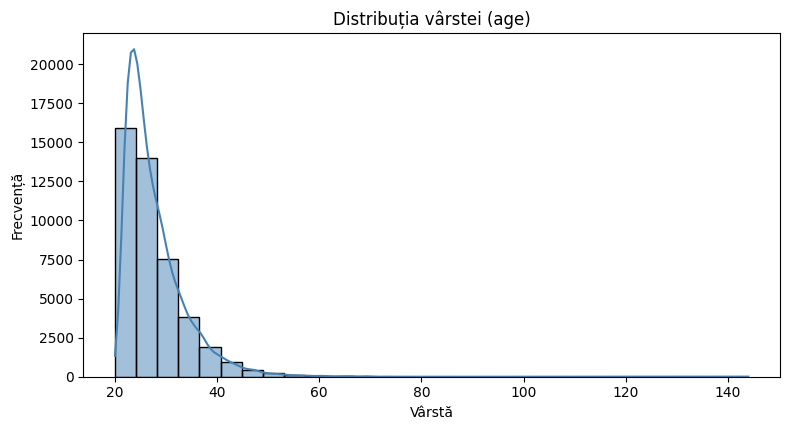

In [9]:
# Distributia variabilei 'age'

plt.figure(figsize=(8, 4.4))
sns.histplot(df['age'], bins=30, kde=True, color='steelblue')
plt.title("Distribuția vârstei (age)")
plt.xlabel("Vârstă")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

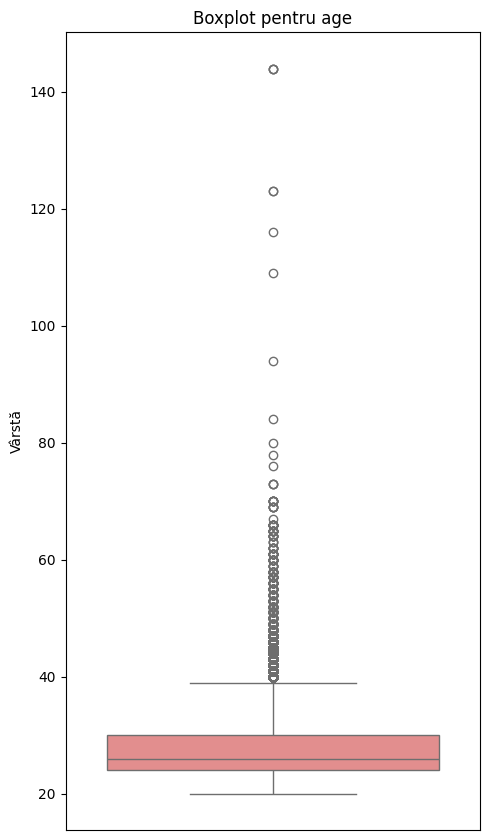

In [10]:
# Box plot

plt.figure(figsize=(5, 8.5))
sns.boxplot(y=df['age'], color='lightcoral', orient='v')
plt.title("Boxplot pentru age")
plt.ylabel("Vârstă")
plt.xticks([])
plt.tight_layout()
plt.show()

Observam prezenta valorilor aberante, asadar vom rezolva aceasta problema in urmatoarele celule de cod

In [11]:
# Winsorizam (capăm) vârsta maximă la 60

df['age'] = df['age'].apply(lambda x: min(x, 60))

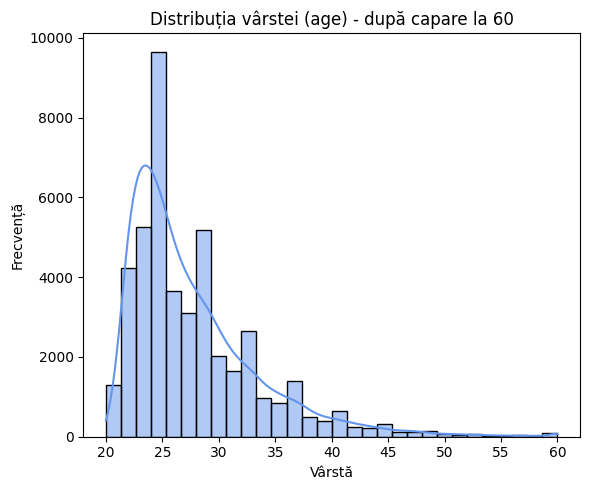

In [12]:
# Noua histogramă

plt.figure(figsize=(6, 5))
sns.histplot(df['age'], bins=30, kde=True, color='cornflowerblue')
plt.title("Distribuția vârstei (age) - după capare la 60")
plt.xlabel("Vârstă")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

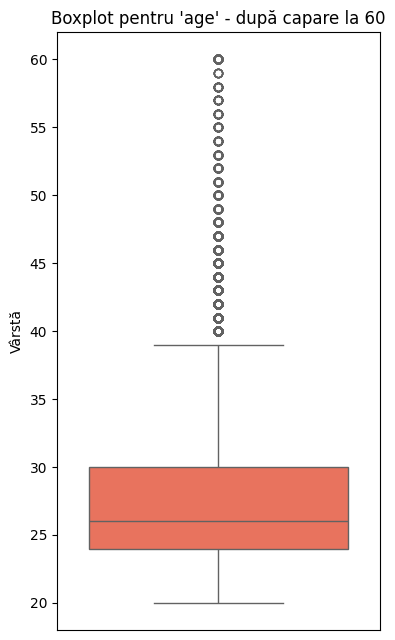

In [13]:
# Noul box-plot

plt.figure(figsize=(4, 6.5))
sns.boxplot(y=df['age'], color='tomato', orient='v')
plt.title("Boxplot pentru 'age' - după capare la 60")
plt.ylabel("Vârstă")
plt.xticks([])
plt.tight_layout()
plt.show()

In [14]:
print("Statistici descriptive pentru 'age':")
print(df['age'].describe())

Statistici descriptive pentru 'age':
count   45,000.00
mean        27.74
std          5.86
min         20.00
25%         24.00
50%         26.00
75%         30.00
max         60.00
Name: age, dtype: float64


<ipython-input-15-2184db59672a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='age', palette='Set1')


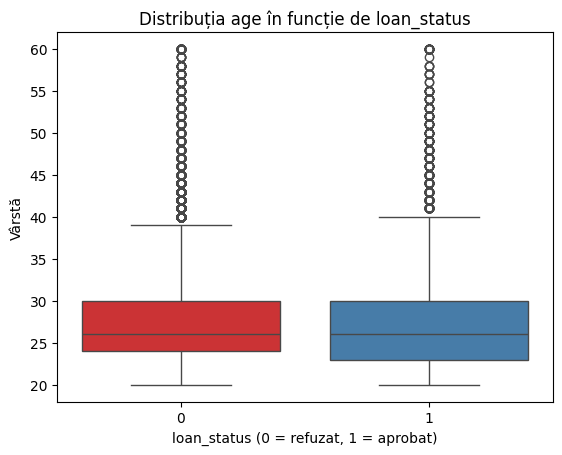

In [15]:
# Distribuția age în funcție de loan_status

sns.boxplot(data=df, x='loan_status', y='age', palette='Set1')
plt.title("Distribuția age în funcție de loan_status")
plt.xlabel("loan_status (0 = refuzat, 1 = aprobat)")
plt.ylabel("Vârstă")
plt.show()

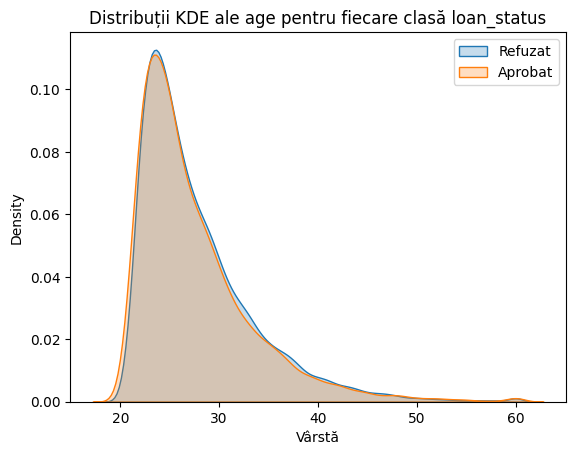

In [16]:
# Kernel Density Estimate (KDE) pe clase de loan_status

sns.kdeplot(data=df[df['loan_status'] == 0]['age'], label='Refuzat', fill=True)
sns.kdeplot(data=df[df['loan_status'] == 1]['age'], label='Aprobat', fill=True)
plt.title("Distribuții KDE ale age pentru fiecare clasă loan_status")
plt.xlabel("Vârstă")
plt.legend()
plt.show()

In [17]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corrs = df[numeric_cols].corr()['loan_status'].sort_values(ascending=False)
print("Corelații între age și alte variabile numerice:")
print(corrs)

Corelații între age și alte variabile numerice:
loan_status      1.00
income_ratio     0.38
int_rate         0.33
loan_amt         0.11
cred_score      -0.01
cred_hist_len   -0.01
exp_years       -0.02
age             -0.02
income          -0.14
Name: loan_status, dtype: float64


##### II. 2 Variabila `gender`

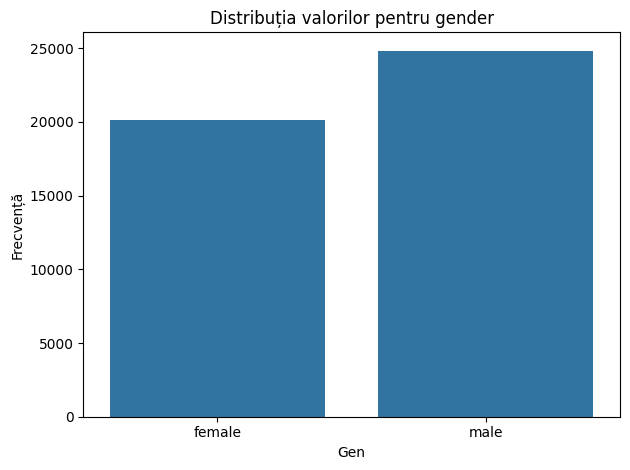

In [18]:
# Frecvența valorilor

sns.countplot(data=df, x='gender')
plt.title("Distribuția valorilor pentru gender")
plt.xlabel("Gen")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

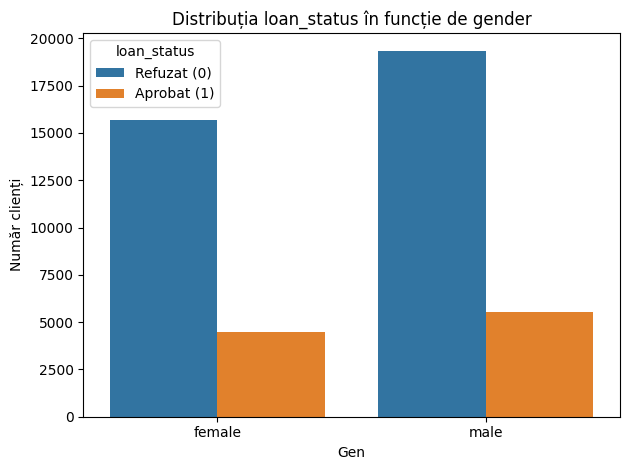

In [19]:
# Distribuția gender în funcție de loan_status

sns.countplot(data=df, x='gender', hue='loan_status')
plt.title("Distribuția loan_status în funcție de gender")
plt.xlabel("Gen")
plt.ylabel("Număr clienți")
plt.legend(title='loan_status', labels=['Refuzat (0)', 'Aprobat (1)'])
plt.tight_layout()
plt.show()

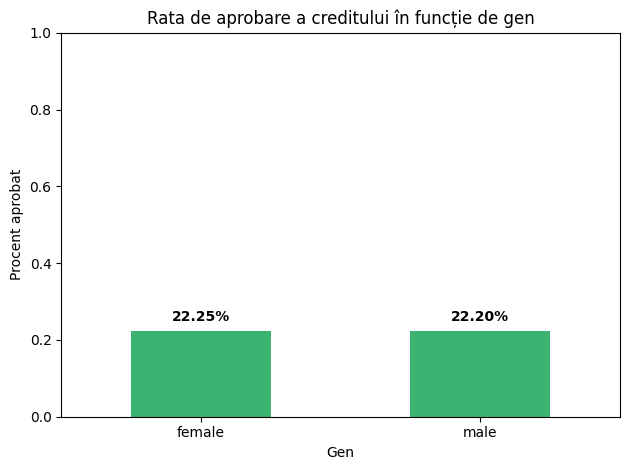

In [20]:
# Rată de aprobare per gen (procentual)

# Calculam rata de aprobare
approval_by_gender = df.groupby('gender')['loan_status'].mean()

# Creem graficul
ax = approval_by_gender.plot(kind='bar', color='mediumseagreen')

# Adaugam titluri și axe
plt.title("Rata de aprobare a creditului în funcție de gen")
plt.ylabel("Procent aprobat")
plt.xlabel("Gen")
plt.ylim(0, 1)
plt.xticks(rotation=0)

# Adaugam etichete cu procente deasupra fiecărei bare
for i, v in enumerate(approval_by_gender):
    ax.text(i, v + 0.02, f"{v:.2%}", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

##### II. 3 Variabila `education`

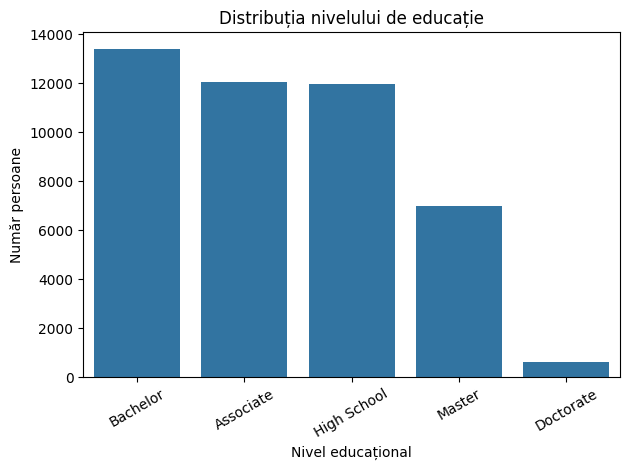

In [21]:
# Frecvența valorilor

sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.title("Distribuția nivelului de educație")
plt.xlabel("Nivel educațional")
plt.ylabel("Număr persoane")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

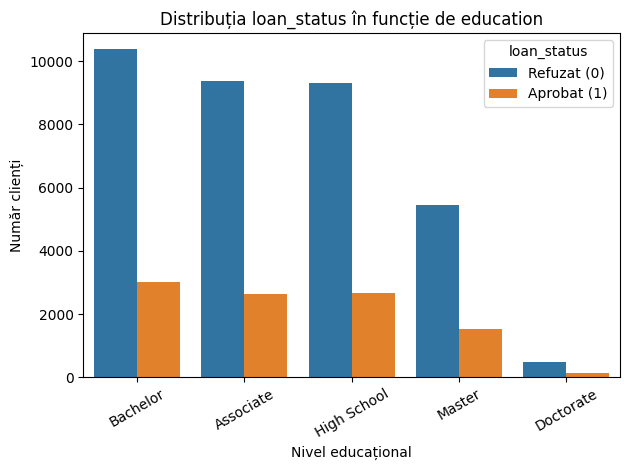

In [22]:
# Distribuție education în funcție de loan_status

sns.countplot(data=df, x='education', hue='loan_status',
              order=df['education'].value_counts().index)
plt.title("Distribuția loan_status în funcție de education")
plt.xlabel("Nivel educațional")
plt.ylabel("Număr clienți")
plt.legend(title='loan_status', labels=['Refuzat (0)', 'Aprobat (1)'])
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

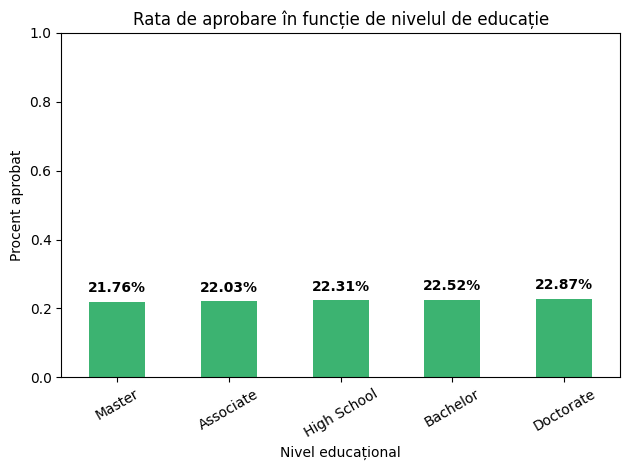

In [23]:
# Rată de aprobare per nivel educațional (cu procente pe bare)

approval_by_edu = df.groupby('education')['loan_status'].mean().sort_values()

ax = approval_by_edu.plot(kind='bar', color='mediumseagreen')
plt.title("Rata de aprobare în funcție de nivelul de educație")
plt.ylabel("Procent aprobat")
plt.xlabel("Nivel educațional")
plt.ylim(0, 1)
plt.xticks(rotation=30)

# Etichete cu procente
for i, v in enumerate(approval_by_edu):
    ax.text(i, v + 0.02, f"{v:.2%}", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

##### II. 4 Variabila `income`

In [24]:
# Statistici descriptive

print("Statistici descriptive pentru 'income':")
print(df['income'].describe())
print(f"\nSkewness: {df['income'].skew():.2f}")
print(f"Kurtosis: {df['income'].kurtosis():.2f}")

Statistici descriptive pentru 'income':
count      45,000.00
mean       80,319.05
std        80,422.50
min         8,000.00
25%        47,204.00
50%        67,048.00
75%        95,789.25
max     7,200,766.00
Name: income, dtype: float64

Skewness: 34.14
Kurtosis: 2398.68


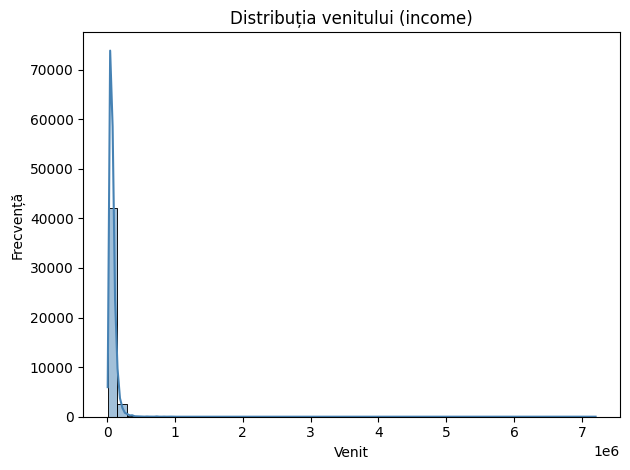

In [25]:
# Histogramă + KDE (distribuție generală)

sns.histplot(df['income'], bins=50, kde=True, color='steelblue')
plt.title("Distribuția venitului (income)")
plt.xlabel("Venit")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

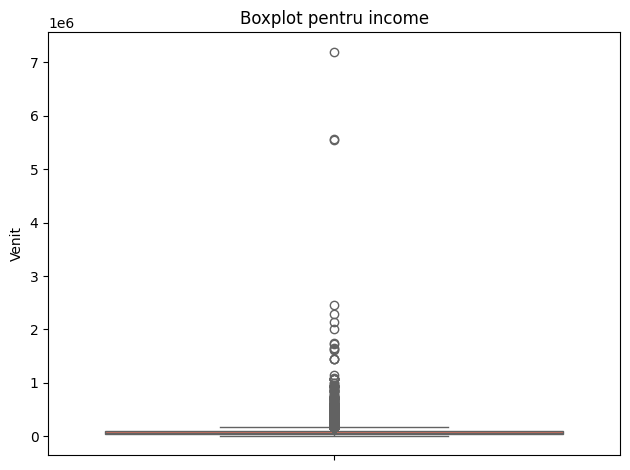

In [26]:
# Boxplot pentru detectarea outlierilor

sns.boxplot(y=df['income'], color='tomato')
plt.title("Boxplot pentru income")
plt.ylabel("Venit")
plt.tight_layout()
plt.show()

In [27]:
# Winsorizam, intrucat avem outlieri superiori extremi
upper_limit = df['income'].quantile(0.99)
df['income'] = df['income'].apply(lambda x: min(x, upper_limit))

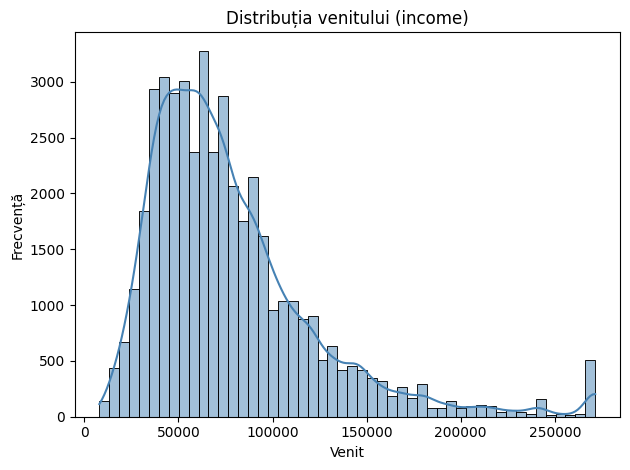

In [28]:
# Noua histograma
sns.histplot(df['income'], bins=50, kde=True, color='steelblue')
plt.title("Distribuția venitului (income)")
plt.xlabel("Venit")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

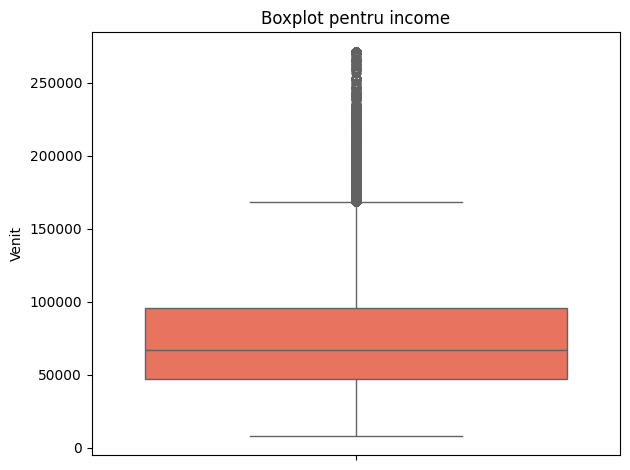

In [29]:
# Noul box-plot

sns.boxplot(y=df['income'], color='tomato')
plt.title("Boxplot pentru income")
plt.ylabel("Venit")
plt.tight_layout()
plt.show()

<ipython-input-30-bb542c864143>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='income', palette='Set2')


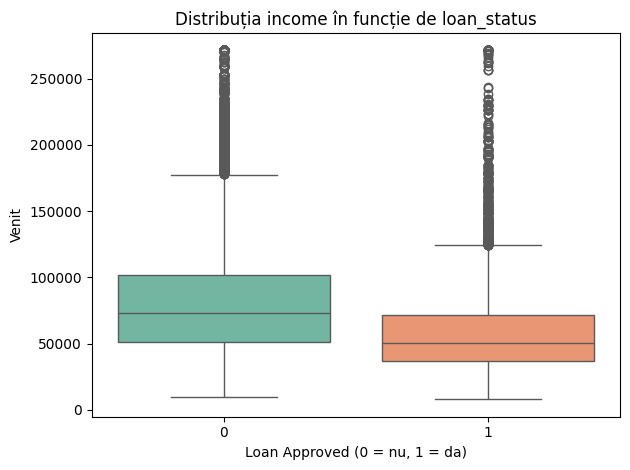

In [30]:
# Distribuția income în funcție de loan_status

sns.boxplot(data=df, x='loan_status', y='income', palette='Set2')
plt.title("Distribuția income în funcție de loan_status")
plt.xlabel("Loan Approved (0 = nu, 1 = da)")
plt.ylabel("Venit")
plt.tight_layout()
plt.show()

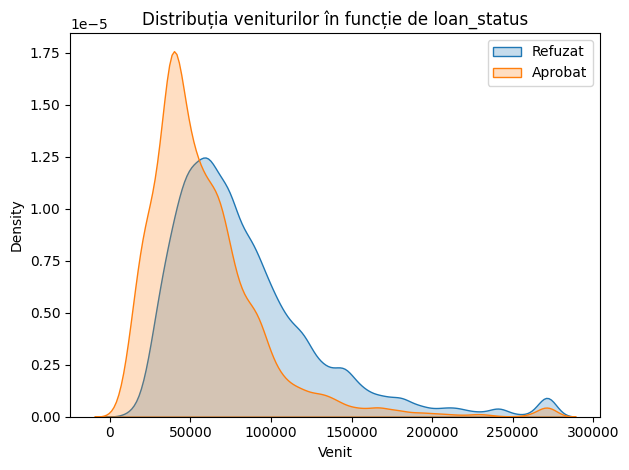

In [31]:
# KDE comparativ: venit aprobați vs. refuzați

sns.kdeplot(data=df[df['loan_status'] == 0]['income'], label='Refuzat', fill=True)
sns.kdeplot(data=df[df['loan_status'] == 1]['income'], label='Aprobat', fill=True)
plt.title("Distribuția veniturilor în funcție de loan_status")
plt.xlabel("Venit")
plt.legend()
plt.tight_layout()
plt.show()

##### II. 5 Variabila `exp_years`

In [32]:
# Statistici descriptive

print("Statistici descriptive pentru 'exp_years':")
print(df['exp_years'].describe())
print(f"Skewness: {df['exp_years'].skew():.2f}")
print(f"Kurtosis: {df['exp_years'].kurtosis():.2f}")

Statistici descriptive pentru 'exp_years':
count   45,000.00
mean         5.41
std          6.06
min          0.00
25%          1.00
50%          4.00
75%          8.00
max        125.00
Name: exp_years, dtype: float64
Skewness: 2.59
Kurtosis: 19.17


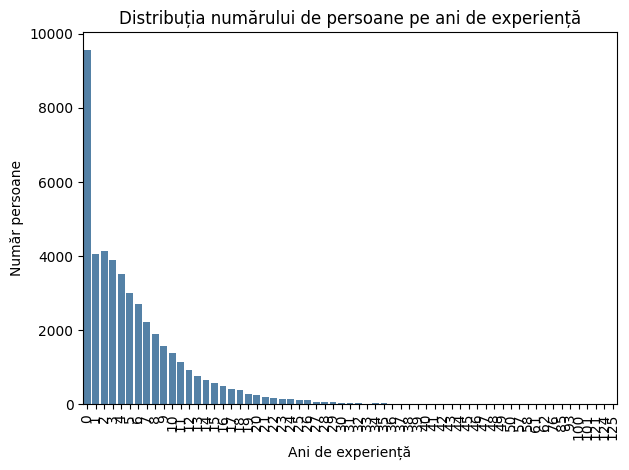

In [33]:
# Countplot

sns.countplot(data=df, x='exp_years', color='steelblue')
plt.title("Distribuția numărului de persoane pe ani de experiență")
plt.xlabel("Ani de experiență")
plt.ylabel("Număr persoane")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

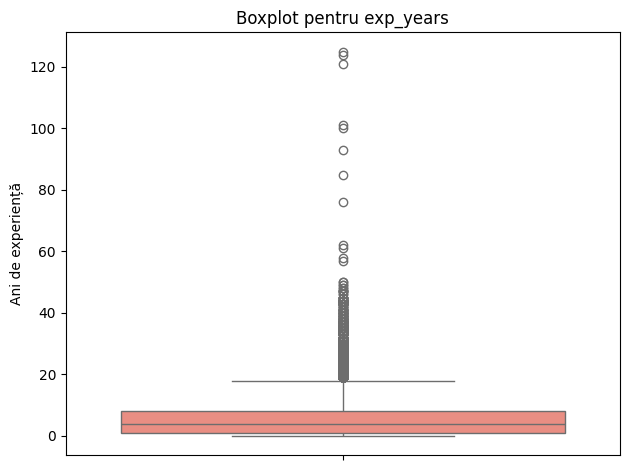

In [34]:
# Box-plot

sns.boxplot(y=df['exp_years'], color='salmon')
plt.title("Boxplot pentru exp_years")
plt.ylabel("Ani de experiență")
plt.tight_layout()
plt.show()

In [35]:
cap_value = df['exp_years'].quantile(0.99)

df['exp_years'] = df['exp_years'].apply(lambda x: min(x, cap_value))

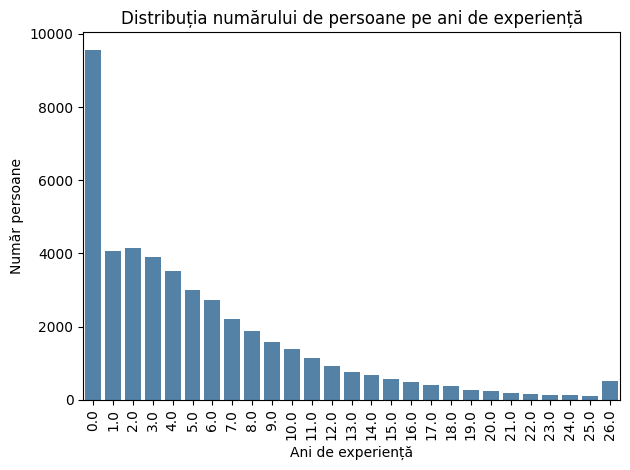

In [36]:
# Noua distributie

sns.countplot(data=df, x='exp_years', color='steelblue')
plt.title("Distribuția numărului de persoane pe ani de experiență")
plt.xlabel("Ani de experiență")
plt.ylabel("Număr persoane")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

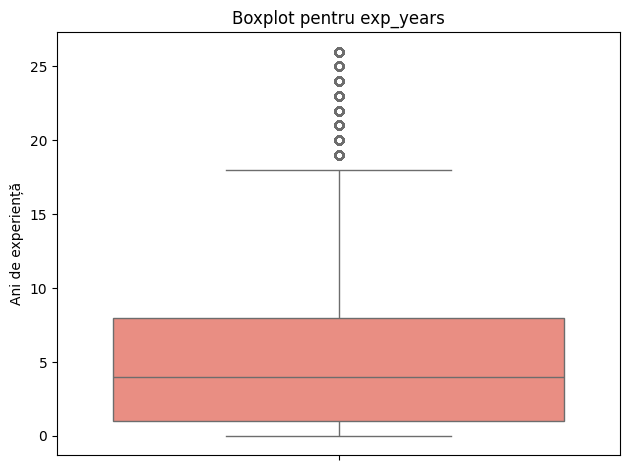

In [37]:
# Noul box-plot

sns.boxplot(y=df['exp_years'], color='salmon')
plt.title("Boxplot pentru exp_years")
plt.ylabel("Ani de experiență")
plt.tight_layout()
plt.show()

<ipython-input-38-595de5330f58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='exp_years', palette='Set2')


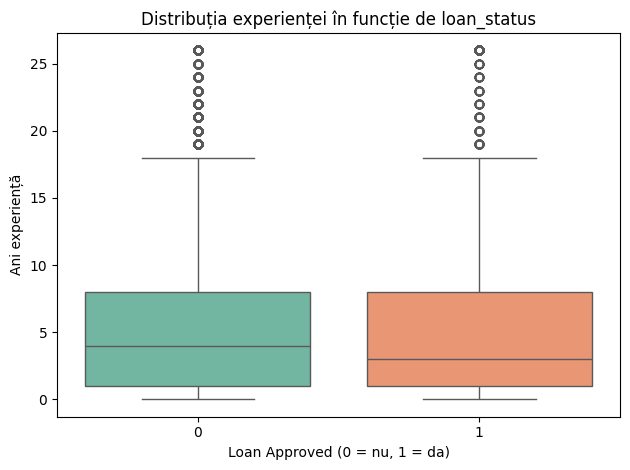

In [38]:
# Distribuție în funcție de loan_status

sns.boxplot(data=df, x='loan_status', y='exp_years', palette='Set2')
plt.title("Distribuția experienței în funcție de loan_status")
plt.xlabel("Loan Approved (0 = nu, 1 = da)")
plt.ylabel("Ani experiență")
plt.tight_layout()
plt.show()

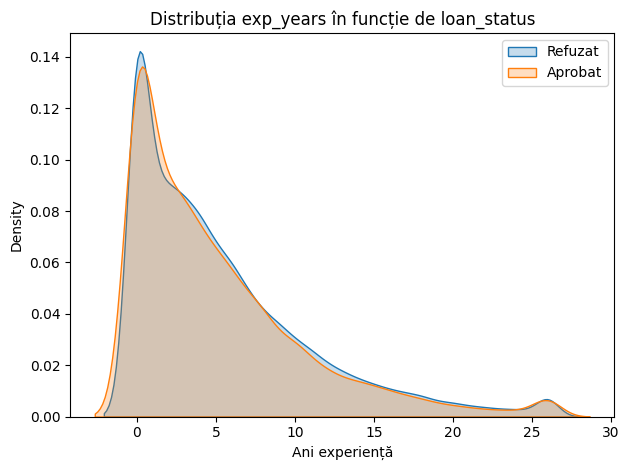

In [39]:
sns.kdeplot(data=df[df['loan_status'] == 0]['exp_years'], label='Refuzat', fill=True)
sns.kdeplot(data=df[df['loan_status'] == 1]['exp_years'], label='Aprobat', fill=True)
plt.title("Distribuția exp_years în funcție de loan_status")
plt.xlabel("Ani experiență")
plt.legend()
plt.tight_layout()
plt.show()

##### II. 6 Variabila `home_owner`


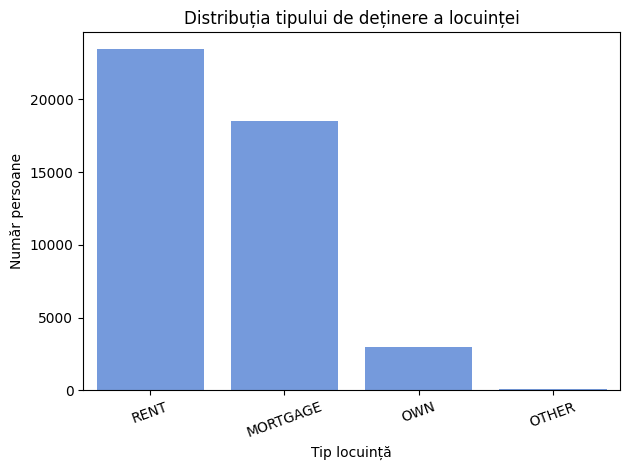

In [40]:
# Distributia variabilei

sns.countplot(data=df, x='home_owner', order=df['home_owner'].value_counts().index, color='cornflowerblue')
plt.title("Distribuția tipului de deținere a locuinței")
plt.xlabel("Tip locuință")
plt.ylabel("Număr persoane")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

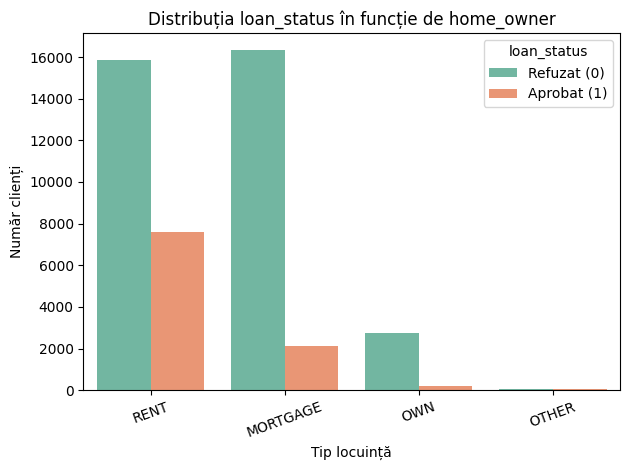

In [41]:
# Distribuția home_owner în funcție de loan_status

sns.countplot(data=df, x='home_owner', hue='loan_status',
              order=df['home_owner'].value_counts().index,
              palette='Set2')
plt.title("Distribuția loan_status în funcție de home_owner")
plt.xlabel("Tip locuință")
plt.ylabel("Număr clienți")
plt.legend(title='loan_status', labels=['Refuzat (0)', 'Aprobat (1)'])
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

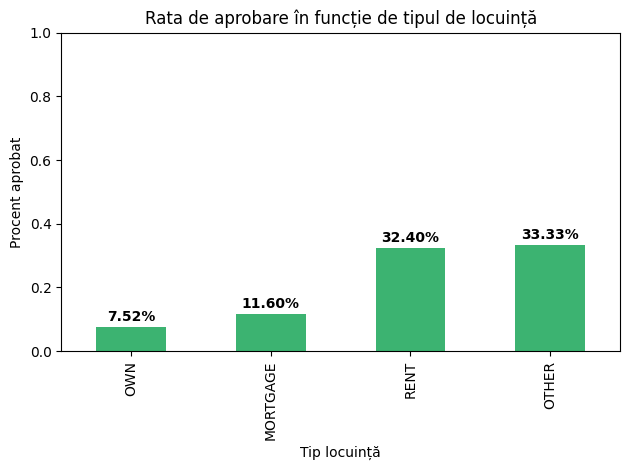

In [42]:
# Rată de aprobare per categorie (cu etichete deasupra)

approval_by_home = df.groupby('home_owner')['loan_status'].mean().sort_values()

ax = approval_by_home.plot(kind='bar', color='mediumseagreen')
plt.title("Rata de aprobare în funcție de tipul de locuință")
plt.ylabel("Procent aprobat")
plt.xlabel("Tip locuință")
plt.ylim(0, 1)

# Adaugă etichete procentuale
for i, v in enumerate(approval_by_home):
    ax.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

##### II. 7 Variabila `loan amt`

In [43]:
# Statistici descriptive

print("Statistici descriptive pentru 'loan_amt':")
print(df['loan_amt'].describe())
print(f"Skewness: {df['loan_amt'].skew():.2f}")
print(f"Kurtosis: {df['loan_amt'].kurtosis():.2f}")

Statistici descriptive pentru 'loan_amt':
count   45,000.00
mean     9,583.16
std      6,314.89
min        500.00
25%      5,000.00
50%      8,000.00
75%     12,237.25
max     35,000.00
Name: loan_amt, dtype: float64
Skewness: 1.18
Kurtosis: 1.35


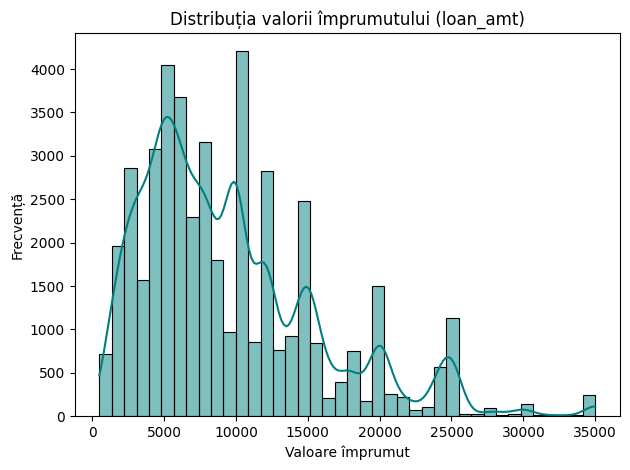

In [44]:
# Histogramă + KDE

sns.histplot(df['loan_amt'], bins=40, kde=True, color='teal')
plt.title("Distribuția valorii împrumutului (loan_amt)")
plt.xlabel("Valoare împrumut")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

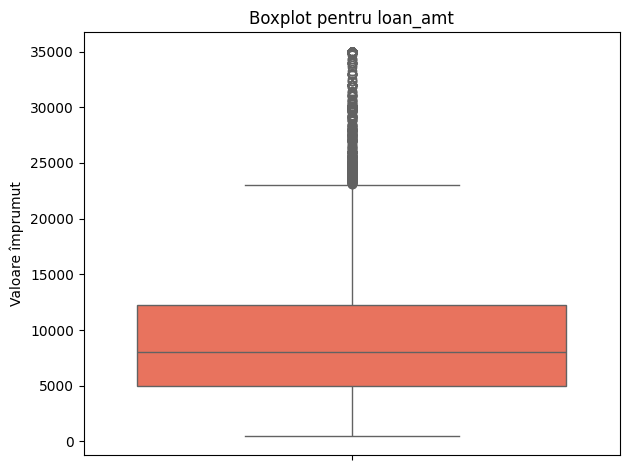

In [45]:
# Box-plot

sns.boxplot(y=df['loan_amt'], color='tomato')
plt.title("Boxplot pentru loan_amt")
plt.ylabel("Valoare împrumut")
plt.tight_layout()
plt.show()

<ipython-input-46-51319b86aac7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='loan_amt', palette='Set2')


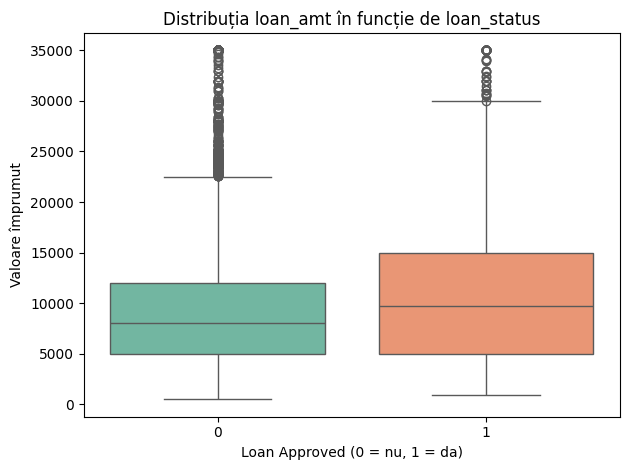

In [46]:
# Distribuție în funcție de loan_status

sns.boxplot(data=df, x='loan_status', y='loan_amt', palette='Set2')
plt.title("Distribuția loan_amt în funcție de loan_status")
plt.xlabel("Loan Approved (0 = nu, 1 = da)")
plt.ylabel("Valoare împrumut")
plt.tight_layout()
plt.show()

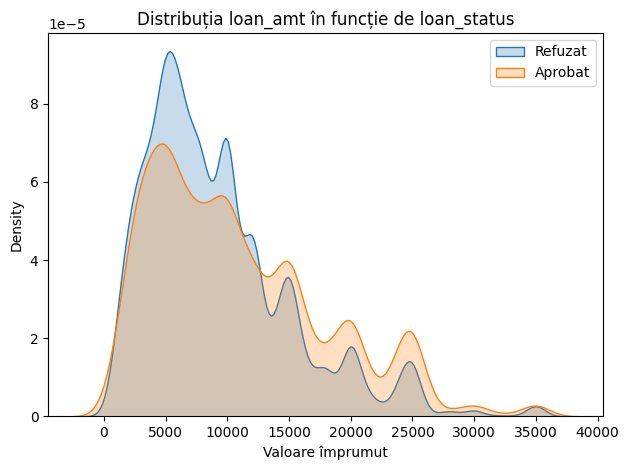

In [47]:
# KDE comparativ (refuzați vs. aprobați)

sns.kdeplot(data=df[df['loan_status'] == 0]['loan_amt'], label='Refuzat', fill=True)
sns.kdeplot(data=df[df['loan_status'] == 1]['loan_amt'], label='Aprobat', fill=True)
plt.title("Distribuția loan_amt în funcție de loan_status")
plt.xlabel("Valoare împrumut")
plt.legend()
plt.tight_layout()
plt.show()

##### II. 8 Variabila `loan_purpose`

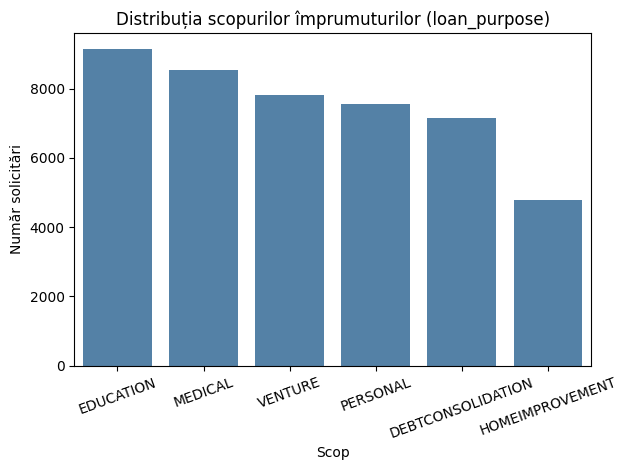

In [48]:
# Distribuția frecvențelor

sns.countplot(data=df, x='loan_purpose', order=df['loan_purpose'].value_counts().index, color='steelblue')
plt.title("Distribuția scopurilor împrumuturilor (loan_purpose)")
plt.xlabel("Scop")
plt.ylabel("Număr solicitări")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

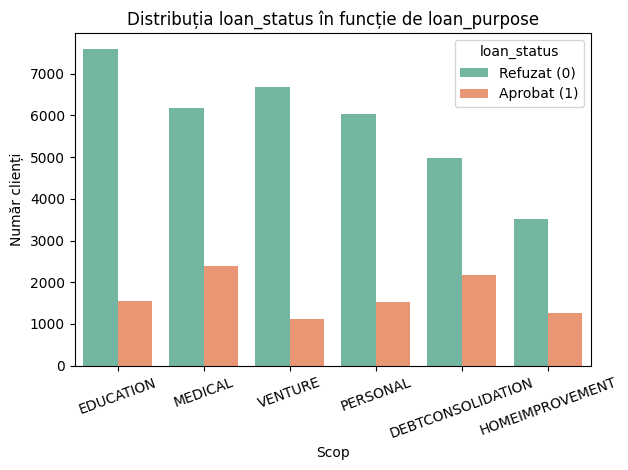

In [49]:
# Distribuția loan_status în funcție de loan_purpose

sns.countplot(data=df, x='loan_purpose', hue='loan_status',
              order=df['loan_purpose'].value_counts().index,
              palette='Set2')
plt.title("Distribuția loan_status în funcție de loan_purpose")
plt.xlabel("Scop")
plt.ylabel("Număr clienți")
plt.legend(title='loan_status', labels=['Refuzat (0)', 'Aprobat (1)'])
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

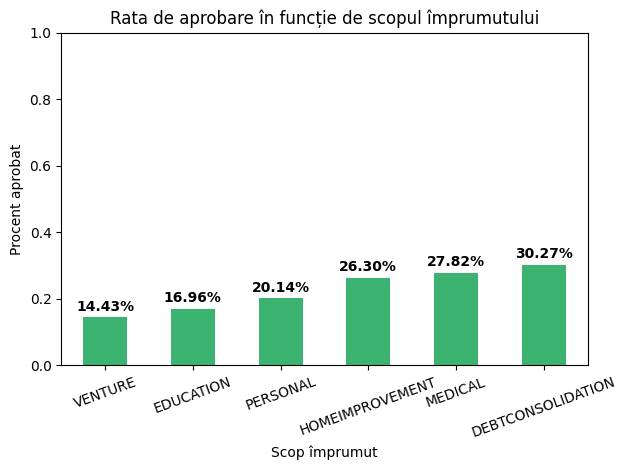

In [50]:
# Rată de aprobare per categorie

approval_by_purpose = df.groupby('loan_purpose')['loan_status'].mean().sort_values()

ax = approval_by_purpose.plot(kind='bar', color='mediumseagreen')
plt.title("Rata de aprobare în funcție de scopul împrumutului")
plt.ylabel("Procent aprobat")
plt.xlabel("Scop împrumut")
plt.ylim(0, 1)
plt.xticks(rotation=20)

# Adăugăm etichete cu procente
for i, v in enumerate(approval_by_purpose):
    ax.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

##### II. 9 Variabila `int_rate`

In [51]:
# Statistici descriptive

print("Statistici descriptive pentru 'int_rate':")
print(df['int_rate'].describe())
print(f"Skewness: {df['int_rate'].skew():.2f}")
print(f"Kurtosis: {df['int_rate'].kurtosis():.2f}")

Statistici descriptive pentru 'int_rate':
count   45,000.00
mean        11.01
std          2.98
min          5.42
25%          8.59
50%         11.01
75%         12.99
max         20.00
Name: int_rate, dtype: float64
Skewness: 0.21
Kurtosis: -0.42


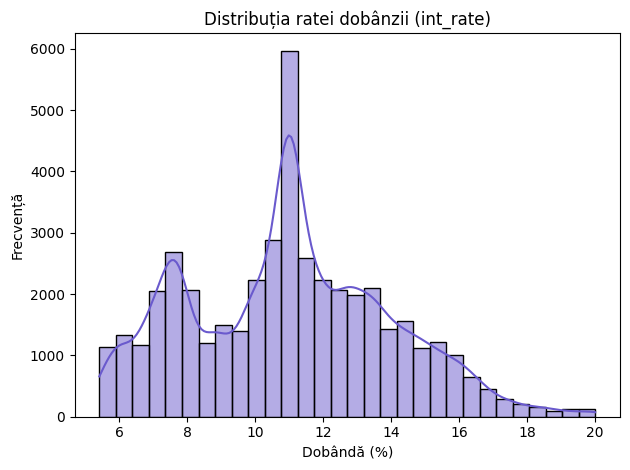

In [52]:
# Histogramă + KDE

sns.histplot(df['int_rate'], bins=30, kde=True, color='slateblue')
plt.title("Distribuția ratei dobânzii (int_rate)")
plt.xlabel("Dobândă (%)")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

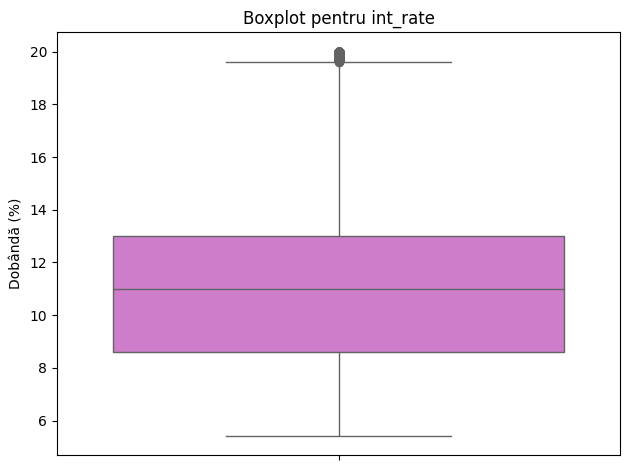

In [53]:
# Box-plot

sns.boxplot(y=df['int_rate'], color='orchid')
plt.title("Boxplot pentru int_rate")
plt.ylabel("Dobândă (%)")
plt.tight_layout()
plt.show()

<ipython-input-54-39e9bb5e168f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='int_rate', palette='Set2')


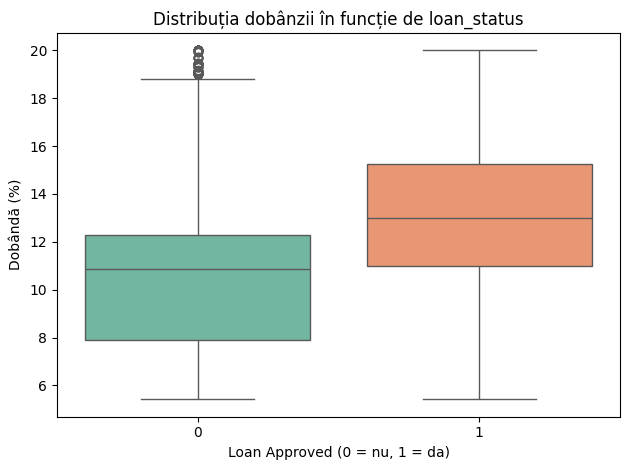

In [54]:
# Distribuția în funcție de loan_status

sns.boxplot(data=df, x='loan_status', y='int_rate', palette='Set2')
plt.title("Distribuția dobânzii în funcție de loan_status")
plt.xlabel("Loan Approved (0 = nu, 1 = da)")
plt.ylabel("Dobândă (%)")
plt.tight_layout()
plt.show()

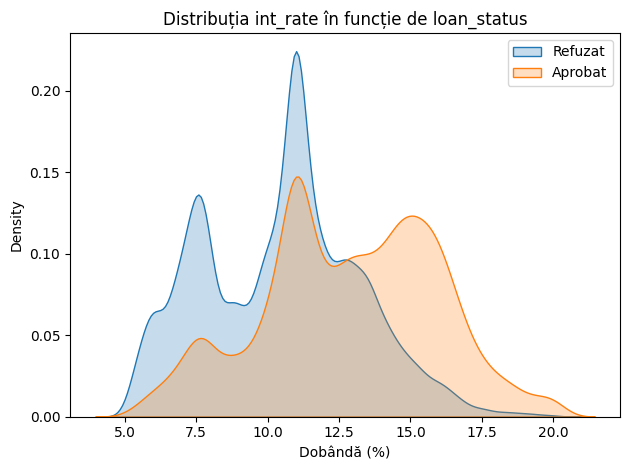

In [55]:
#  KDE comparativ (refuzați vs. aprobați)

sns.kdeplot(data=df[df['loan_status'] == 0]['int_rate'], label='Refuzat', fill=True)
sns.kdeplot(data=df[df['loan_status'] == 1]['int_rate'], label='Aprobat', fill=True)
plt.title("Distribuția int_rate în funcție de loan_status")
plt.xlabel("Dobândă (%)")
plt.legend()
plt.tight_layout()
plt.show()

##### II. 10 Variabila `income ratio`

In [56]:
# Statistici descriptive

print("Statistici descriptive pentru 'income_ratio':")
print(df['income_ratio'].describe())
print(f"Skewness: {df['income_ratio'].skew():.2f}")
print(f"Kurtosis: {df['income_ratio'].kurtosis():.2f}")

Statistici descriptive pentru 'income_ratio':
count   45,000.00
mean         0.14
std          0.09
min          0.00
25%          0.07
50%          0.12
75%          0.19
max          0.66
Name: income_ratio, dtype: float64
Skewness: 1.03
Kurtosis: 1.08


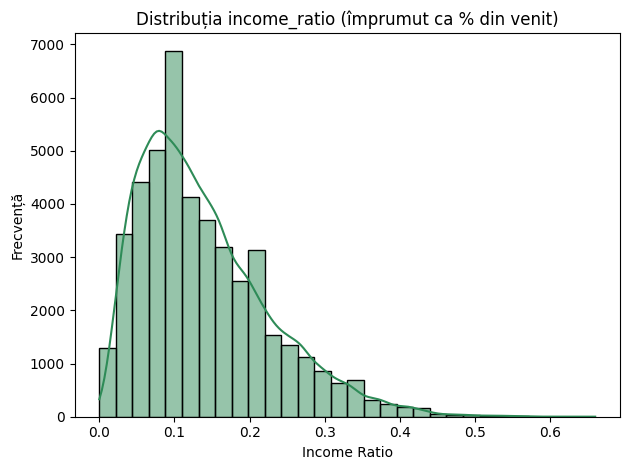

In [57]:
# Histograma

sns.histplot(df['income_ratio'], bins=30, kde=True, color='seagreen')
plt.title("Distribuția income_ratio (împrumut ca % din venit)")
plt.xlabel("Income Ratio")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

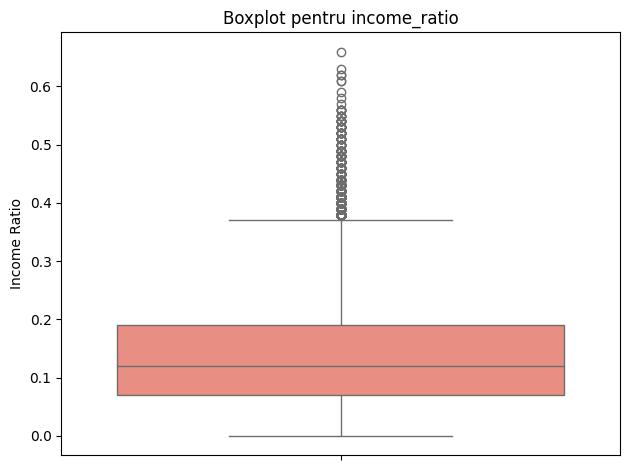

In [58]:
# Box-plot

sns.boxplot(y=df['income_ratio'], color='salmon')
plt.title("Boxplot pentru income_ratio")
plt.ylabel("Income Ratio")
plt.tight_layout()
plt.show()

In [59]:
# Winsorizam cu valoarea cuantilei 99

cap_value = df['income_ratio'].quantile(0.99)
print(f"Valoare capare propusă (p99): {cap_value:.4f}")

df['income_ratio'] = df['income_ratio'].apply(lambda x: min(x, cap_value))

Valoare capare propusă (p99): 0.4000


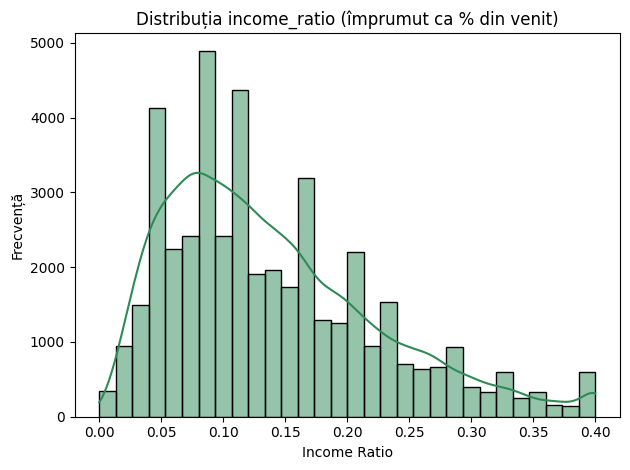

In [60]:
# Noua histograma

sns.histplot(df['income_ratio'], bins=30, kde=True, color='seagreen')
plt.title("Distribuția income_ratio (împrumut ca % din venit)")
plt.xlabel("Income Ratio")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

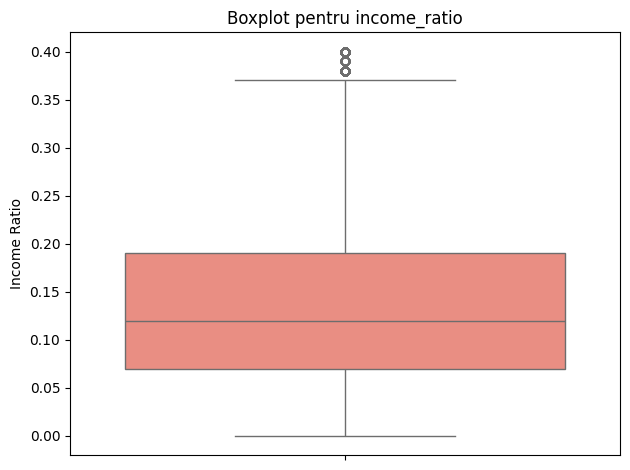

In [61]:
# Noul box-plot

sns.boxplot(y=df['income_ratio'], color='salmon')
plt.title("Boxplot pentru income_ratio")
plt.ylabel("Income Ratio")
plt.tight_layout()
plt.show()

<ipython-input-62-d43b650bf055>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='income_ratio', palette='Set2')


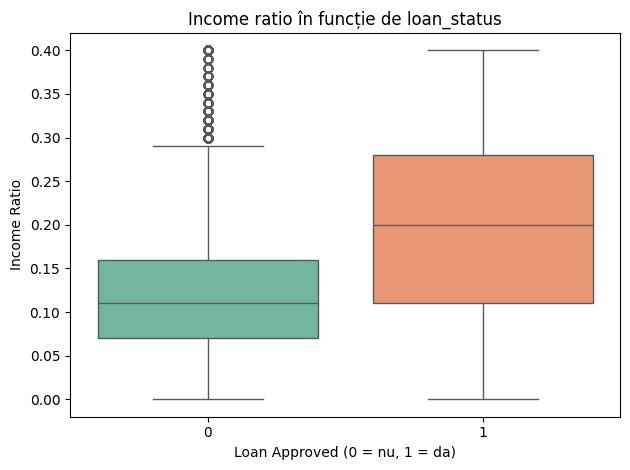

In [62]:
# Distribuția income_ratio în funcție de loan_status

sns.boxplot(data=df, x='loan_status', y='income_ratio', palette='Set2')
plt.title("Income ratio în funcție de loan_status")
plt.xlabel("Loan Approved (0 = nu, 1 = da)")
plt.ylabel("Income Ratio")
plt.tight_layout()
plt.show()

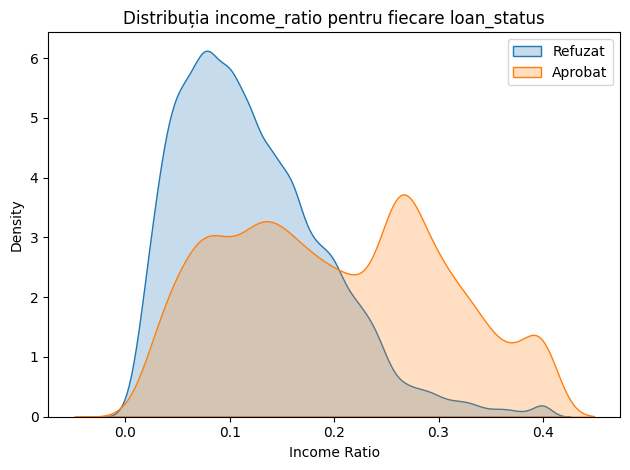

In [63]:
# KDE comparativ (refuzați vs. aprobați)

sns.kdeplot(data=df[df['loan_status'] == 0]['income_ratio'], label='Refuzat', fill=True)
sns.kdeplot(data=df[df['loan_status'] == 1]['income_ratio'], label='Aprobat', fill=True)
plt.title("Distribuția income_ratio pentru fiecare loan_status")
plt.xlabel("Income Ratio")
plt.legend()
plt.tight_layout()
plt.show()

##### II. 11 Variabila `cred_hist_len`

In [64]:
# Statistici descriptive

print("Statistici descriptive pentru 'cred_hist_len':")
print(df['cred_hist_len'].describe())
print(f"Skewness: {df['cred_hist_len'].skew():.2f}")
print(f"Kurtosis: {df['cred_hist_len'].kurtosis():.2f}")

Statistici descriptive pentru 'cred_hist_len':
count   45,000.00
mean         5.87
std          3.88
min          2.00
25%          3.00
50%          4.00
75%          8.00
max         30.00
Name: cred_hist_len, dtype: float64
Skewness: 1.63
Kurtosis: 3.73


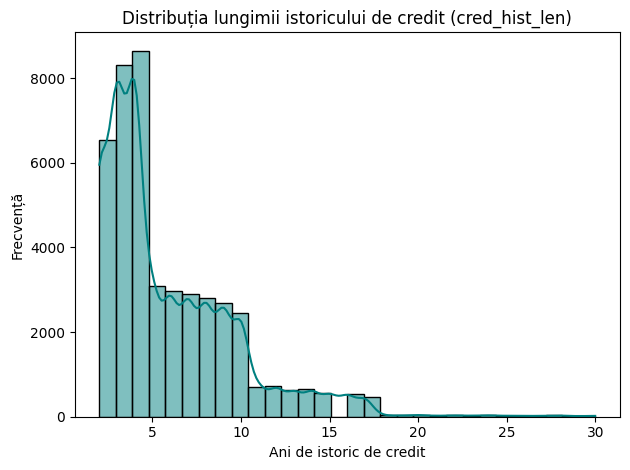

In [65]:
# Distributie

sns.histplot(df['cred_hist_len'], bins=30, kde=True, color='teal')
plt.title("Distribuția lungimii istoricului de credit (cred_hist_len)")
plt.xlabel("Ani de istoric de credit")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

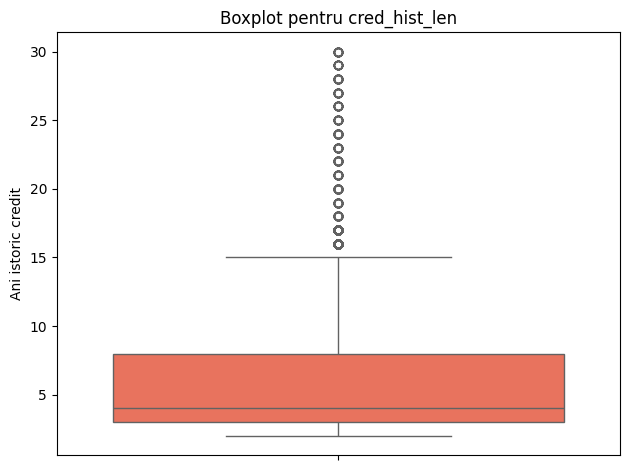

In [66]:
#Box-plot

sns.boxplot(y=df['cred_hist_len'], color='tomato')
plt.title("Boxplot pentru cred_hist_len")
plt.ylabel("Ani istoric credit")
plt.tight_layout()
plt.show()

<ipython-input-67-5069fe645d6b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='cred_hist_len', palette='Set2')


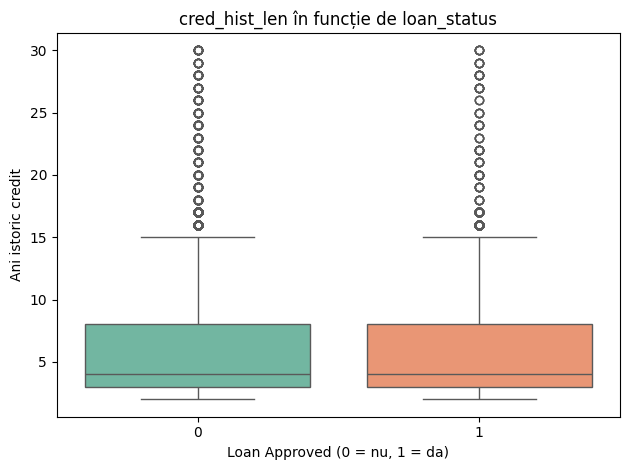

In [67]:
# Distribuție în funcție de loan_status

sns.boxplot(data=df, x='loan_status', y='cred_hist_len', palette='Set2')
plt.title("cred_hist_len în funcție de loan_status")
plt.xlabel("Loan Approved (0 = nu, 1 = da)")
plt.ylabel("Ani istoric credit")
plt.tight_layout()
plt.show()

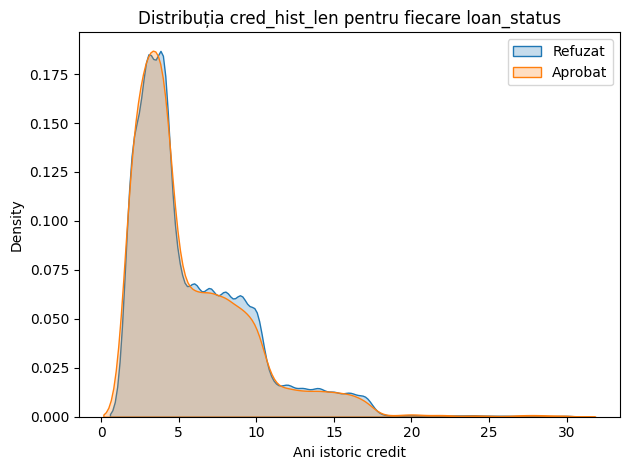

In [68]:
# KDE comparativ aprobați vs. refuzați

sns.kdeplot(data=df[df['loan_status'] == 0]['cred_hist_len'], label='Refuzat', fill=True)
sns.kdeplot(data=df[df['loan_status'] == 1]['cred_hist_len'], label='Aprobat', fill=True)
plt.title("Distribuția cred_hist_len pentru fiecare loan_status")
plt.xlabel("Ani istoric credit")
plt.legend()
plt.tight_layout()
plt.show()

##### II. 12 Variabila `cred_score`

In [69]:
# Statistici descriptive

print("Statistici descriptive pentru 'cred_score':")
print(df['cred_score'].describe())
print(f"Skewness: {df['cred_score'].skew():.2f}")
print(f"Kurtosis: {df['cred_score'].kurtosis():.2f}")

Statistici descriptive pentru 'cred_score':
count   45,000.00
mean       632.61
std         50.44
min        390.00
25%        601.00
50%        640.00
75%        670.00
max        850.00
Name: cred_score, dtype: float64
Skewness: -0.61
Kurtosis: 0.20


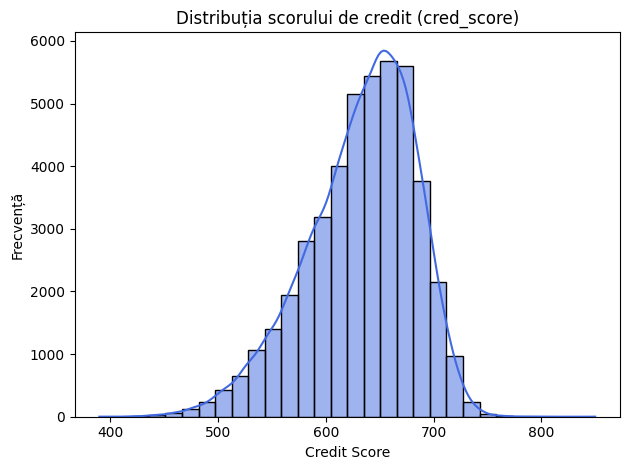

In [70]:
# Distributia

sns.histplot(df['cred_score'], bins=30, kde=True, color='royalblue')
plt.title("Distribuția scorului de credit (cred_score)")
plt.xlabel("Credit Score")
plt.ylabel("Frecvență")
plt.tight_layout()
plt.show()

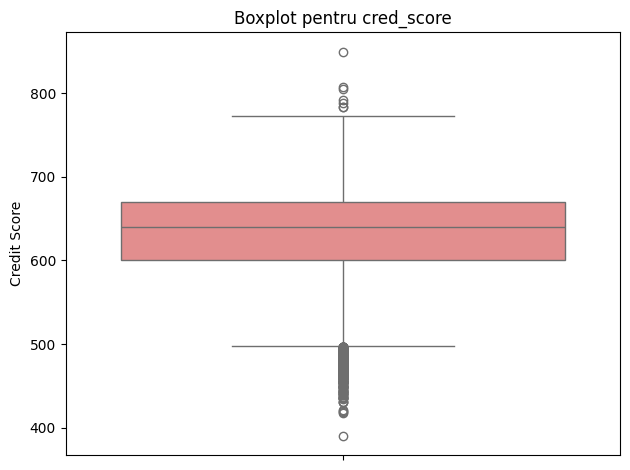

In [71]:
# Box-plot

sns.boxplot(y=df['cred_score'], color='lightcoral')
plt.title("Boxplot pentru cred_score")
plt.ylabel("Credit Score")
plt.tight_layout()
plt.show()

<ipython-input-72-822b91b54289>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='cred_score', palette='Set2')


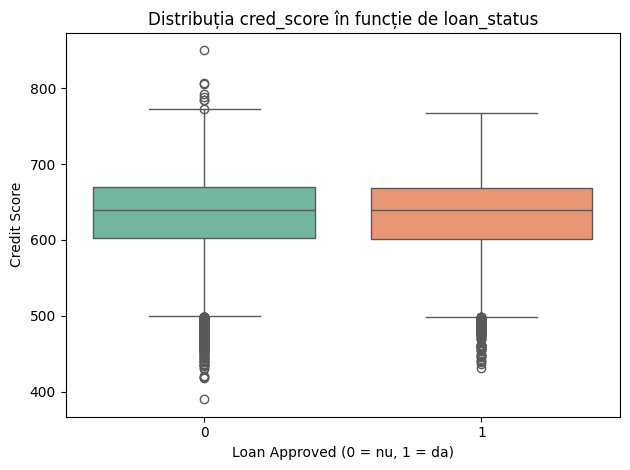

In [72]:
# Distributia in functie de loan_status

sns.boxplot(data=df, x='loan_status', y='cred_score', palette='Set2')
plt.title("Distribuția cred_score în funcție de loan_status")
plt.xlabel("Loan Approved (0 = nu, 1 = da)")
plt.ylabel("Credit Score")
plt.tight_layout()
plt.show()

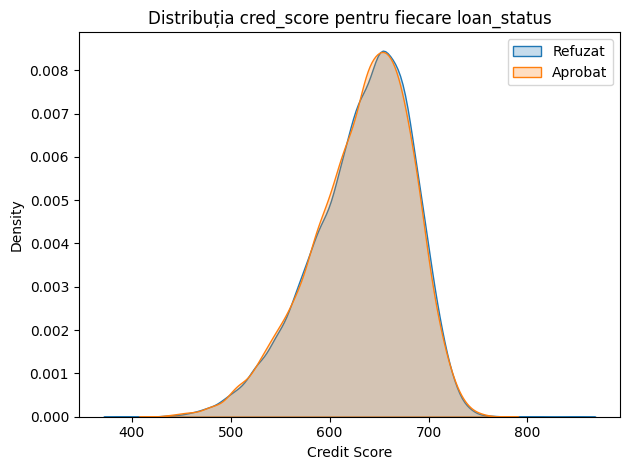

In [73]:
# KDE comparativ (aprobati & refuzati)

sns.kdeplot(data=df[df['loan_status'] == 0]['cred_score'], label='Refuzat', fill=True)
sns.kdeplot(data=df[df['loan_status'] == 1]['cred_score'], label='Aprobat', fill=True)
plt.title("Distribuția cred_score pentru fiecare loan_status")
plt.xlabel("Credit Score")
plt.legend()
plt.tight_layout()
plt.show()

##### II. 13 Variabila `has_default`

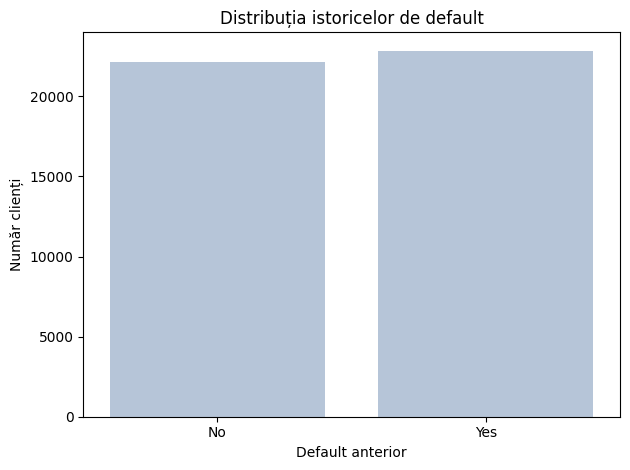

In [74]:
# Bar-chart cu frecvente

sns.countplot(x='has_default', data=df, color='lightsteelblue')
plt.title("Distribuția istoricelor de default")
plt.xlabel("Default anterior")
plt.ylabel("Număr clienți")
plt.tight_layout()
plt.show()

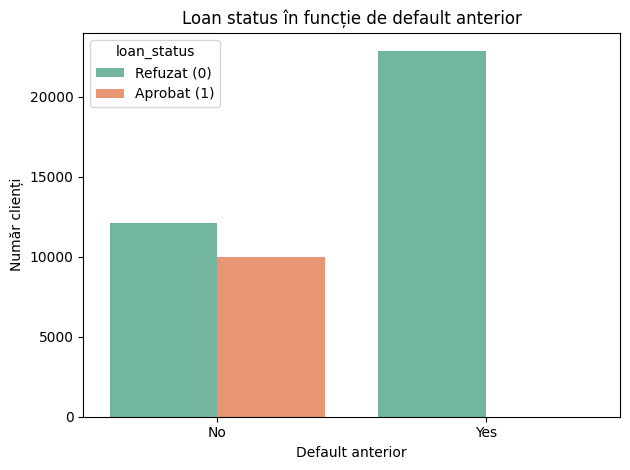

In [75]:
# Loan_status in functie de has_default
sns.countplot(x='has_default', hue='loan_status', data=df, palette='Set2')
plt.title("Loan status în funcție de default anterior")
plt.xlabel("Default anterior")
plt.ylabel("Număr clienți")
plt.legend(title='loan_status', labels=['Refuzat (0)', 'Aprobat (1)'])
plt.tight_layout()
plt.show()

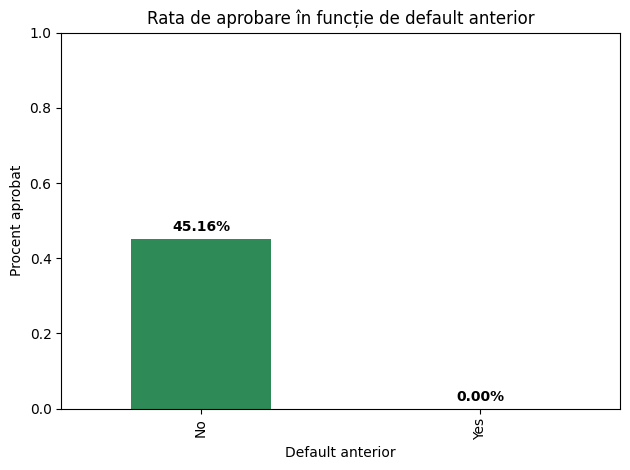

In [76]:
# Rata de aprobare

approval_by_default = df.groupby('has_default')['loan_status'].mean()

ax = approval_by_default.plot(kind='bar', color='seagreen')
plt.title("Rata de aprobare în funcție de default anterior")
plt.ylabel("Procent aprobat")
plt.xlabel("Default anterior")
plt.ylim(0, 1)

# Adaugă etichete
for i, v in enumerate(approval_by_default):
    ax.text(i, v + 0.02, f"{v:.2%}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

##### II. 14 Variabila `loan status`

In [77]:
# Număr absolut de observații
print("Distribuția absolută a valorilor în 'loan_status':")
print(df['loan_status'].value_counts())

# Distribuție procentuală
print("\nDistribuția procentuală:")
print(df['loan_status'].value_counts(normalize=True).apply(lambda x: f"{x:.2%}"))

Distribuția absolută a valorilor în 'loan_status':
loan_status
0    35000
1    10000
Name: count, dtype: int64

Distribuția procentuală:
loan_status
0    77.78%
1    22.22%
Name: proportion, dtype: object


<ipython-input-78-06e4afd223f1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='loan_status', data=df, palette='Set2')


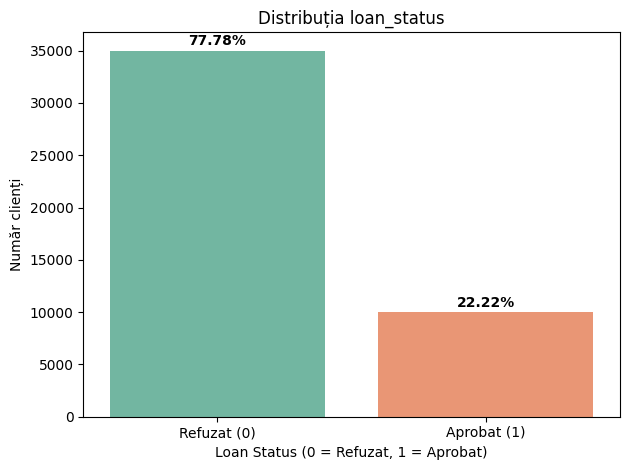

In [78]:
ax = sns.countplot(x='loan_status', data=df, palette='Set2')
plt.title("Distribuția loan_status")
plt.xlabel("Loan Status (0 = Refuzat, 1 = Aprobat)")
plt.ylabel("Număr clienți")
plt.xticks([0, 1], ['Refuzat (0)', 'Aprobat (1)'])

# Adaugă procente pe bare
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total
    ax.text(p.get_x() + p.get_width() / 2., height + 500,
            f'{percentage:.2%}', ha="center", fontweight='bold')

plt.tight_layout()
plt.show()

In [79]:
# Selectăm variabilele numerice
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculăm corelațiile față de loan_status
loan_corr = df[numeric_cols].corr()['loan_status'].sort_values(ascending=False)

# Afișăm rezultatul
print("Corelațiile cu loan_status (descrescător):")
print(loan_corr)

Corelațiile cu loan_status (descrescător):
loan_status      1.00
income_ratio     0.39
int_rate         0.33
loan_amt         0.11
cred_score      -0.01
cred_hist_len   -0.01
age             -0.02
exp_years       -0.02
income          -0.22
Name: loan_status, dtype: float64


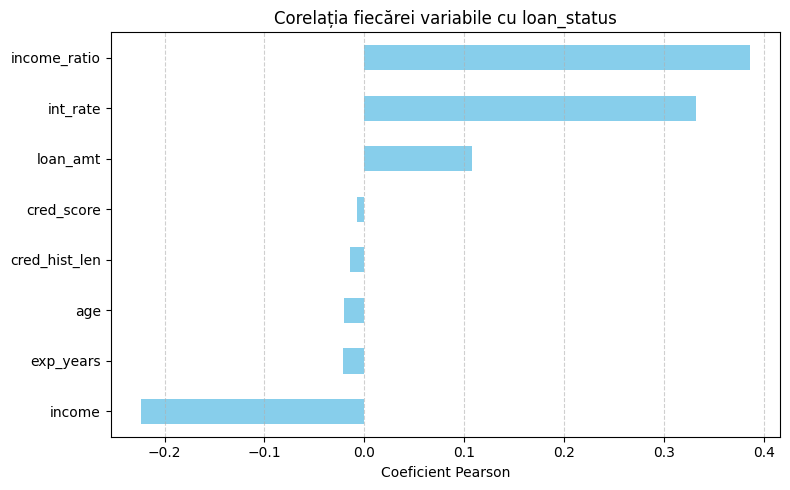

In [80]:
# Eliminăm loan_status (care are corelație 1 cu sine însuși)
loan_corr_no_self = loan_corr.drop('loan_status')

plt.figure(figsize=(8, 5))
loan_corr_no_self.plot(kind='barh', color='skyblue')
plt.title("Corelația fiecărei variabile cu loan_status")
plt.xlabel("Coeficient Pearson")
plt.gca().invert_yaxis()  # cea mai mare corelație sus
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [81]:
# Calculam coeficientul de corelatie Spearmann intre variabila educatie (ordinala) si loan_status (binara)

rho, p_value = spearmanr(df['education'], df['loan_status'])

print(f"Spearman rho: {rho:.3f}")
print(f"P-value: {p_value:.4f}")

Spearman rho: -0.001
P-value: 0.8057


# III. Simularea valorilor lipsa

In [82]:
df_original = df.copy(deep=True)

In [83]:
df_original.head()

age  gender    education    income  exp_years home_owner  loan_amt  \
0 22.00  female       Master 71,948.00       0.00       RENT 35,000.00   
1 21.00  female  High School 12,282.00       0.00        OWN  1,000.00   
2 25.00  female  High School 12,438.00       3.00   MORTGAGE  5,500.00   
3 23.00  female     Bachelor 79,753.00       0.00       RENT 35,000.00   
4 24.00    male       Master 66,135.00       1.00       RENT 35,000.00   

  loan_purpose  int_rate  income_ratio  cred_hist_len  cred_score has_default  \
0     PERSONAL     16.02          0.40           3.00         561          No   
1    EDUCATION     11.14          0.08           2.00         504         Yes   
2      MEDICAL     12.87          0.40           3.00         635          No   
3      MEDICAL     15.23          0.40           2.00         675          No   
4      MEDICAL     14.27          0.40           4.00         586          No   

   loan_status  
0            1  
1            0  
2            1  
3            1  
4            1

In [84]:
def introduce_missing_values(df, fraction=0.05, exclude_columns=['loan_status', 'id'], seed=42):
    """
    Funcția parcurge fiecare coloană din DataFrame (cu excepția celor specificate) și introduce
    valori lipsă (`NaN`) în poziții aleatorii, pentru a simula absența datelor.

    Parametri:
            df: DataFrame-ul principal fără valori lipsă ce va fi modificat
            fraction: procentul dorit de missing values (per coloană)
            exclude_columns: listă de coloane ce vor fi excluse de la introducerea valorilor lipsă
            seed: seed pentru randomizare reproductibilă

    Returnează:
            df_missing: copia DataFrame-ului cu valori lipsă introduse
    """
    np.random.seed(seed)
    df_missing = df.copy()

    for col in df.columns:
        if col in exclude_columns:
            continue  # Sărim peste coloanele excluse
        missing_indices = np.random.choice(df.index, size=int(fraction * len(df)), replace=False)
        df_missing.loc[missing_indices, col] = np.nan

    return df_missing

In [85]:
df = introduce_missing_values(df, fraction=0.05, exclude_columns=['loan_status', 'id'])

missing_values = df.isnull().sum()
print('Valori lipsă per coloană:')
print(missing_values)

Valori lipsă per coloană:
age              2250
gender           2250
education        2250
income           2250
exp_years        2250
home_owner       2250
loan_amt         2250
loan_purpose     2250
int_rate         2250
income_ratio     2250
cred_hist_len    2250
cred_score       2250
has_default      2250
loan_status         0
dtype: int64


In [86]:
df.head(10)

age  gender    education     income  exp_years home_owner  loan_amt  \
0 22.00  female       Master  71,948.00       0.00       RENT 35,000.00   
1 21.00  female  High School  12,282.00       0.00        OWN  1,000.00   
2 25.00  female  High School  12,438.00       3.00   MORTGAGE  5,500.00   
3 23.00  female     Bachelor  79,753.00       0.00       RENT 35,000.00   
4   NaN    male       Master  66,135.00       1.00       RENT 35,000.00   
5 21.00  female  High School  12,951.00       0.00        OWN  2,500.00   
6 26.00  female     Bachelor  93,471.00       1.00       RENT 35,000.00   
7 24.00  female  High School  95,550.00       5.00       RENT 35,000.00   
8 24.00  female          NaN 100,684.00       3.00       RENT 35,000.00   
9 21.00  female  High School  12,739.00       0.00        OWN  1,600.00   

  loan_purpose  int_rate  income_ratio  cred_hist_len  cred_score has_default  \
0     PERSONAL     16.02          0.40           3.00      561.00          No   
1    EDUCATION     11.14          0.08           2.00      504.00         Yes   
2      MEDICAL     12.87          0.40           3.00      635.00          No   
3      MEDICAL     15.23          0.40           2.00      675.00          No   
4      MEDICAL     14.27          0.40           4.00      586.00          No   
5      VENTURE      7.14          0.19           2.00      532.00          No   
6    EDUCATION       NaN          0.37           3.00      701.00          No   
7      MEDICAL     11.11          0.37           4.00      585.00          No   
8     PERSONAL      8.90          0.35           2.00      544.00          No   
9      VENTURE     14.74          0.13           3.00      640.00          No   

   loan_status  
0            1  
1            0  
2            1  
3            1  
4            1  
5            1  
6            1  
7            1  
8            1  
9            1

In [87]:
# Construim un dicționar: cheie = index, valoare = listă de coloane cu NAN
missing_map = {}

for i in df.index:
    missing_cols = df.columns[df.loc[i].isnull()].tolist()
    if missing_cols:
        missing_map[i] = missing_cols

In [88]:
print(missing_map)

{4: ['age'], 6: ['int_rate'], 8: ['education'], 11: ['income_ratio', 'cred_hist_len'], 15: ['home_owner'], 17: ['education'], 19: ['has_default'], 20: ['exp_years', 'has_default'], 25: ['education'], 26: ['exp_years', 'home_owner'], 28: ['loan_amt'], 31: ['cred_hist_len'], 33: ['exp_years'], 34: ['education'], 35: ['income'], 36: ['income'], 38: ['income'], 39: ['home_owner'], 41: ['income', 'home_owner'], 47: ['int_rate'], 50: ['int_rate'], 51: ['loan_purpose', 'has_default'], 53: ['cred_hist_len'], 54: ['income', 'loan_purpose', 'has_default'], 57: ['loan_purpose', 'int_rate', 'cred_hist_len'], 58: ['income_ratio'], 59: ['gender'], 62: ['int_rate'], 64: ['gender'], 65: ['income', 'has_default'], 67: ['loan_purpose', 'cred_score'], 70: ['exp_years'], 73: ['loan_amt', 'int_rate'], 75: ['loan_amt'], 78: ['cred_score'], 79: ['loan_purpose'], 80: ['exp_years'], 81: ['gender'], 88: ['income', 'cred_score'], 91: ['cred_score'], 92: ['gender'], 94: ['cred_score'], 95: ['cred_score'], 96: ['e

# IV. Corelatii si asocieri dintre variabile

In [89]:
# Variabile numerice continue
numerical_columns = [
    'age', 'income', 'exp_years', 'loan_amt', 'int_rate',
    'income_ratio', 'cred_hist_len', 'cred_score'
]

# Variabile nominale
nominal_columns = ['home_owner', 'loan_purpose']

### Mapare variabile non-numerice continue

In [90]:
# Mapping pentru variabile non-numerice
education_map = {
    'High School': 0,
    'Associate': 1,
    'Bachelor': 2,
    'Master': 3,
    'Doctorate': 4
}

gender_map = {
    'female': 0,
    'male': 1
}

has_default_map = {
    'No': 0,
    'Yes': 1
}

# Creem o copie a datelor originale pentru a nu modifica df_original
df_correlations = df_original[numerical_columns].copy()

# Adăugăm coloanele mapate, fără a modifica df_original
df_correlations['education_mapped'] = df_original['education'].map(education_map)
df_correlations['gender_mapped'] = df_original['gender'].map(gender_map)
df_correlations['has_default_mapped'] = df_original['has_default'].map(has_default_map)

# Adăugăm și coloana loan_status
df_correlations['loan_status'] = df_original['loan_status']

# Adăugăm în df_correlations coloanele nominale, fără a modifica df_original
df_correlations[nominal_columns] = df_original[nominal_columns]

In [91]:
df_correlations.head()

age    income  exp_years  loan_amt  int_rate  income_ratio  cred_hist_len  \
0 22.00 71,948.00       0.00 35,000.00     16.02          0.40           3.00   
1 21.00 12,282.00       0.00  1,000.00     11.14          0.08           2.00   
2 25.00 12,438.00       3.00  5,500.00     12.87          0.40           3.00   
3 23.00 79,753.00       0.00 35,000.00     15.23          0.40           2.00   
4 24.00 66,135.00       1.00 35,000.00     14.27          0.40           4.00   

   cred_score  education_mapped  gender_mapped  has_default_mapped  \
0         561                 3              0                   0   
1         504                 0              0                   1   
2         635                 0              0                   0   
3         675                 2              0                   0   
4         586                 3              1                   0   

   loan_status home_owner loan_purpose  
0            1       RENT     PERSONAL  
1            0        OWN    EDUCATION  
2            1   MORTGAGE      MEDICAL  
3            1       RENT      MEDICAL  
4            1       RENT      MEDICAL

In [92]:
# Verificam ca variabilele au fost mapate corect, (numeric, nu caracter)
print(df_correlations.dtypes)

age                   float64
income                float64
exp_years             float64
loan_amt              float64
int_rate              float64
income_ratio          float64
cred_hist_len         float64
cred_score              int64
education_mapped        int64
gender_mapped           int64
has_default_mapped      int64
loan_status             int64
home_owner             object
loan_purpose           object
dtype: object


In [93]:
# Lista variabilelor binare mapate (presupunem că sunt în df_correlations)
binary_columns = ['gender_mapped', 'has_default_mapped', 'loan_status']

# Ordinala mapată (deja adăugată în df_correlations)
ordinal_column = 'education_mapped'

### Numeric cu Numeric (Pearson)

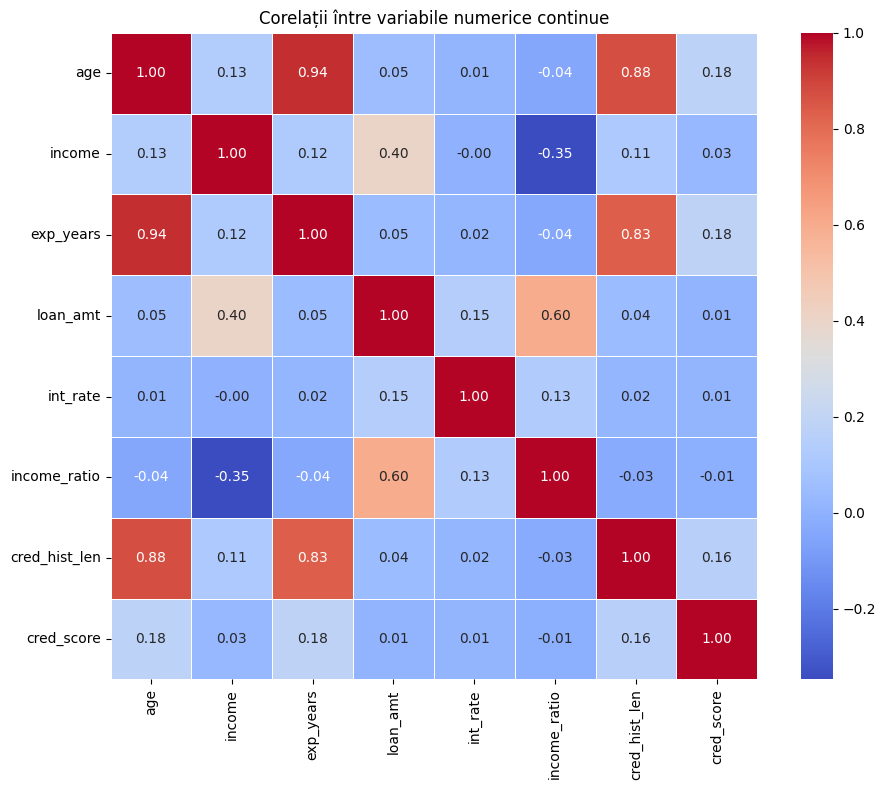

In [182]:
# Calculăm matricea de corelație Pearson
corr_matrix = df_correlations[numerical_columns].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Corelații între variabile numerice continue")
plt.tight_layout()
plt.show()

### Binar cu Binar (Coeficentul Phi)

In [95]:
# Inițializăm un dicționar rezultate
phi_results = {}

# Calculăm coeficientul Phi (Pearson) pentru fiecare pereche de variabile binare
for var1, var2 in combinations(binary_columns, 2):
    x = df_correlations[var1]
    y = df_correlations[var2]

    # Eliminăm valorile lipsă, dacă există
    valid_idx = x.notnull() & y.notnull()
    phi, _ = pearsonr(x[valid_idx], y[valid_idx])

    phi_results[(var1, var2)] = round(phi, 3)

# Afișăm rezultatele
for pair, value in phi_results.items():
    print(f"Phi({pair[0]}, {pair[1]}) = {value}")

Phi(gender_mapped, has_default_mapped) = 0.001
Phi(gender_mapped, loan_status) = -0.001
Phi(has_default_mapped, loan_status) = -0.543


### Binar cu Numeric (Punct Biserial)

In [96]:
pb_results = {}

# Calculăm coeficientul point-biserial pentru fiecare combinație
for num_var in numerical_columns:
    for bin_var in binary_columns:
        x = df_correlations[num_var]
        y = df_correlations[bin_var]

        # Eliminăm valorile lipsă, dacă există
        valid_idx = x.notnull() & y.notnull()
        coef, _ = pointbiserialr(y[valid_idx], x[valid_idx])  # binar, numeric

        pb_results[(num_var, bin_var)] = round(coef, 3)

# Afișăm rezultatele
for pair, value in pb_results.items():
    print(f"Point-Biserial({pair[0]} ↔ {pair[1]}) = {value}")

Point-Biserial(age ↔ gender_mapped) = 0.017
Point-Biserial(age ↔ has_default_mapped) = -0.025
Point-Biserial(age ↔ loan_status) = -0.021
Point-Biserial(income ↔ gender_mapped) = 0.012
Point-Biserial(income ↔ has_default_mapped) = 0.111
Point-Biserial(income ↔ loan_status) = -0.224
Point-Biserial(exp_years ↔ gender_mapped) = 0.012
Point-Biserial(exp_years ↔ has_default_mapped) = -0.027
Point-Biserial(exp_years ↔ loan_status) = -0.021
Point-Biserial(loan_amt ↔ gender_mapped) = 0.011
Point-Biserial(loan_amt ↔ has_default_mapped) = -0.059
Point-Biserial(loan_amt ↔ loan_status) = 0.108
Point-Biserial(int_rate ↔ gender_mapped) = 0.004
Point-Biserial(int_rate ↔ has_default_mapped) = -0.182
Point-Biserial(int_rate ↔ loan_status) = 0.332
Point-Biserial(income_ratio ↔ gender_mapped) = -0.0
Point-Biserial(income_ratio ↔ has_default_mapped) = -0.203
Point-Biserial(income_ratio ↔ loan_status) = 0.385
Point-Biserial(cred_hist_len ↔ gender_mapped) = 0.012
Point-Biserial(cred_hist_len ↔ has_default_ma

### Binar cu Ordinal (Kendall Tau)

In [97]:
kendall_results = {}

# Calcul pentru fiecare pereche
for bin_var in binary_columns:
    x = df_correlations[ordinal_column]
    y = df_correlations[bin_var]

    # Eliminăm valorile lipsă
    valid_idx = x.notnull() & y.notnull()
    coef, _ = kendalltau(x[valid_idx], y[valid_idx])

    kendall_results[(ordinal_column, bin_var)] = round(coef, 3)

# Afișare rezultate
for pair, value in kendall_results.items():
    print(f"Kendall’s Tau-b({pair[0]} ↔ {pair[1]}) = {value}")

Kendall’s Tau-b(education_mapped ↔ gender_mapped) = -0.004
Kendall’s Tau-b(education_mapped ↔ has_default_mapped) = -0.036
Kendall’s Tau-b(education_mapped ↔ loan_status) = -0.001


### Binar cu Nominal (Cramer V)

In [98]:
def cramer_v(x, y):
    """
    Calculează coeficientul Cramer V pentru două variabile categoriale.

    Cramer V este o măsură a asocierii între două variabile categoriale,
    bazată pe testul chi-pătrat. Coeficientui Cramer V poate lua valori de la 0 la 1
    masurand doar intenistatea legaturii dintre variabile, nu si directia.

    Parametri:
        x (pd.Series): Prima variabilă categoriale.
        y (pd.Series): A doua variabilă categoriale.

    Returnează:
        float: Valoarea coeficientului Cramer V.
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    r_corr = r - ((r - 1) ** 2) / (n - 1)
    k_corr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2_corr / min((k_corr - 1), (r_corr - 1)))


In [99]:
cramer_results = {}

for nom in nominal_columns:
    for bin_var in binary_columns:
        x = df_correlations[nom]
        y = df_correlations[bin_var]

        # Eliminăm valorile lipsă
        valid_idx = x.notnull() & y.notnull()
        coef = cramer_v(x[valid_idx], y[valid_idx])

        cramer_results[(nom, bin_var)] = round(coef, 3)

# Afișăm rezultatele
for pair, value in cramer_results.items():
    print(f"Cramer V({pair[0]} ↔ {pair[1]}) = {value}")

Cramer V(home_owner ↔ gender_mapped) = 0.0
Cramer V(home_owner ↔ has_default_mapped) = 0.14
Cramer V(home_owner ↔ loan_status) = 0.258
Cramer V(loan_purpose ↔ gender_mapped) = 0.0
Cramer V(loan_purpose ↔ has_default_mapped) = 0.08
Cramer V(loan_purpose ↔ loan_status) = 0.142


### Ordinal cu Nominal (Cramer V)

In [100]:
cramer_nominal_ordinal = {}

for nom in nominal_columns:
    x = df_correlations[nom]
    y = df_correlations[ordinal_column]

    # Eliminăm valorile lipsă
    valid_idx = x.notnull() & y.notnull()
    coef = cramer_v(x[valid_idx], y[valid_idx])

    cramer_nominal_ordinal[(nom, ordinal_column)] = round(coef, 3)

# Afișăm rezultatele
for pair, value in cramer_nominal_ordinal.items():
    print(f"Cramér’s V({pair[0]} ↔ {pair[1]}) = {value}")

Cramér’s V(home_owner ↔ education_mapped) = 0.006
Cramér’s V(loan_purpose ↔ education_mapped) = 0.012


### Ordinal cu Numeric (Spearmann)

In [101]:
spearman_results = {}

for num_var in numerical_columns:
    x = df_correlations[ordinal_column]
    y = df_correlations[num_var]

    # Eliminăm valorile lipsă
    valid_idx = x.notnull() & y.notnull()
    coef, _ = spearmanr(x[valid_idx], y[valid_idx])

    spearman_results[(ordinal_column, num_var)] = round(coef, 3)

# Afișăm rezultatele
for pair, value in spearman_results.items():
    print(f"Spearman({pair[0]} ↔ {pair[1]}) = {value}")

Spearman(education_mapped ↔ age) = 0.034
Spearman(education_mapped ↔ income) = 0.01
Spearman(education_mapped ↔ exp_years) = 0.025
Spearman(education_mapped ↔ loan_amt) = 0.004
Spearman(education_mapped ↔ int_rate) = 0.004
Spearman(education_mapped ↔ income_ratio) = -0.007
Spearman(education_mapped ↔ cred_hist_len) = 0.02
Spearman(education_mapped ↔ cred_score) = 0.214


### Nominal cu Nominal (Cramer V)

In [102]:
cramer_nominal_nominal = {}

# Toate combinațiile posibile de câte 2 variabile nominale
for var1, var2 in combinations(nominal_columns, 2):
    x = df_correlations[var1]
    y = df_correlations[var2]

    # Eliminăm valorile lipsă
    valid_idx = x.notnull() & y.notnull()
    coef = cramer_v(x[valid_idx], y[valid_idx])

    cramer_nominal_nominal[(var1, var2)] = round(coef, 3)

# Afișăm rezultatele
for pair, value in cramer_nominal_nominal.items():
    print(f"Cramér’s V({pair[0]} ↔ {pair[1]}) = {value}")

Cramér’s V(home_owner ↔ loan_purpose) = 0.082


### Numeric cu Nominal

In [103]:
def eta_squared(numeric_column, categorical_column):
    """
    Calculează coeficientul Eta pătrat pentru asocierea dintre o variabilă numerică și una categorică.

    Eta pătrat este o măsură a mărimii efectului (effect size), utilizată frecvent în analiza ANOVA.
    Ea exprimă proporția din variația variabilei numerice care este explicată de diferențele dintre grupurile categorice.

    Coeficinetul Eta pătrat poate lua valori între 0 și 1.

    Parametri:
        numeric (str): Numele coloanei cu valori numerice continue.
        category (str): Numele coloanei categorice (factor de grupare).

    Returnează:
        float: Valoarea coeficientului Eta pătrat (η²), ca mărime a efectului.
    """
    model = ols(f"{numeric_column} ~ C({categorical_column})", data=df_correlations).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    ss_between = anova_table['sum_sq'][0]
    ss_total = anova_table['sum_sq'].sum()
    return ss_between / ss_total


In [104]:
eta_squared_results = {}

for num_var in numerical_columns:
    for cat_var in nominal_columns:
        try:
            coef = eta_squared(num_var, cat_var)
            eta_squared_results[(num_var, cat_var)] = round(coef, 3)
        except:
            eta_squared_results[(num_var, cat_var)] = None  # În caz de eroare

# Afișăm rezultatele
for pair, value in eta_squared_results.items():
    print(f"Eta²({pair[0]} ↔ {pair[1]}) = {value}")

<ipython-input-103-47e61bc61cde>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ss_between = anova_table['sum_sq'][0]
<ipython-input-103-47e61bc61cde>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ss_between = anova_table['sum_sq'][0]
<ipython-input-103-47e61bc61cde>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ss_between = anova_table['sum_sq'][0]
<ipython-input-103-47e61bc61cde>:19: FutureWarning: Series.__getitem__ tr

Eta²(age ↔ home_owner) = 0.002
Eta²(age ↔ loan_purpose) = 0.011
Eta²(income ↔ home_owner) = 0.125
Eta²(income ↔ loan_purpose) = 0.009
Eta²(exp_years ↔ home_owner) = 0.002
Eta²(exp_years ↔ loan_purpose) = 0.009
Eta²(loan_amt ↔ home_owner) = 0.023
Eta²(loan_amt ↔ loan_purpose) = 0.003
Eta²(int_rate ↔ home_owner) = 0.018
Eta²(int_rate ↔ loan_purpose) = 0.001
Eta²(income_ratio ↔ home_owner) = 0.025
Eta²(income_ratio ↔ loan_purpose) = 0.001
Eta²(cred_hist_len ↔ home_owner) = 0.001
Eta²(cred_hist_len ↔ loan_purpose) = 0.008
Eta²(cred_score ↔ home_owner) = 0.0
Eta²(cred_score ↔ loan_purpose) = 0.0


<ipython-input-103-47e61bc61cde>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ss_between = anova_table['sum_sq'][0]


### Diagrama Finala

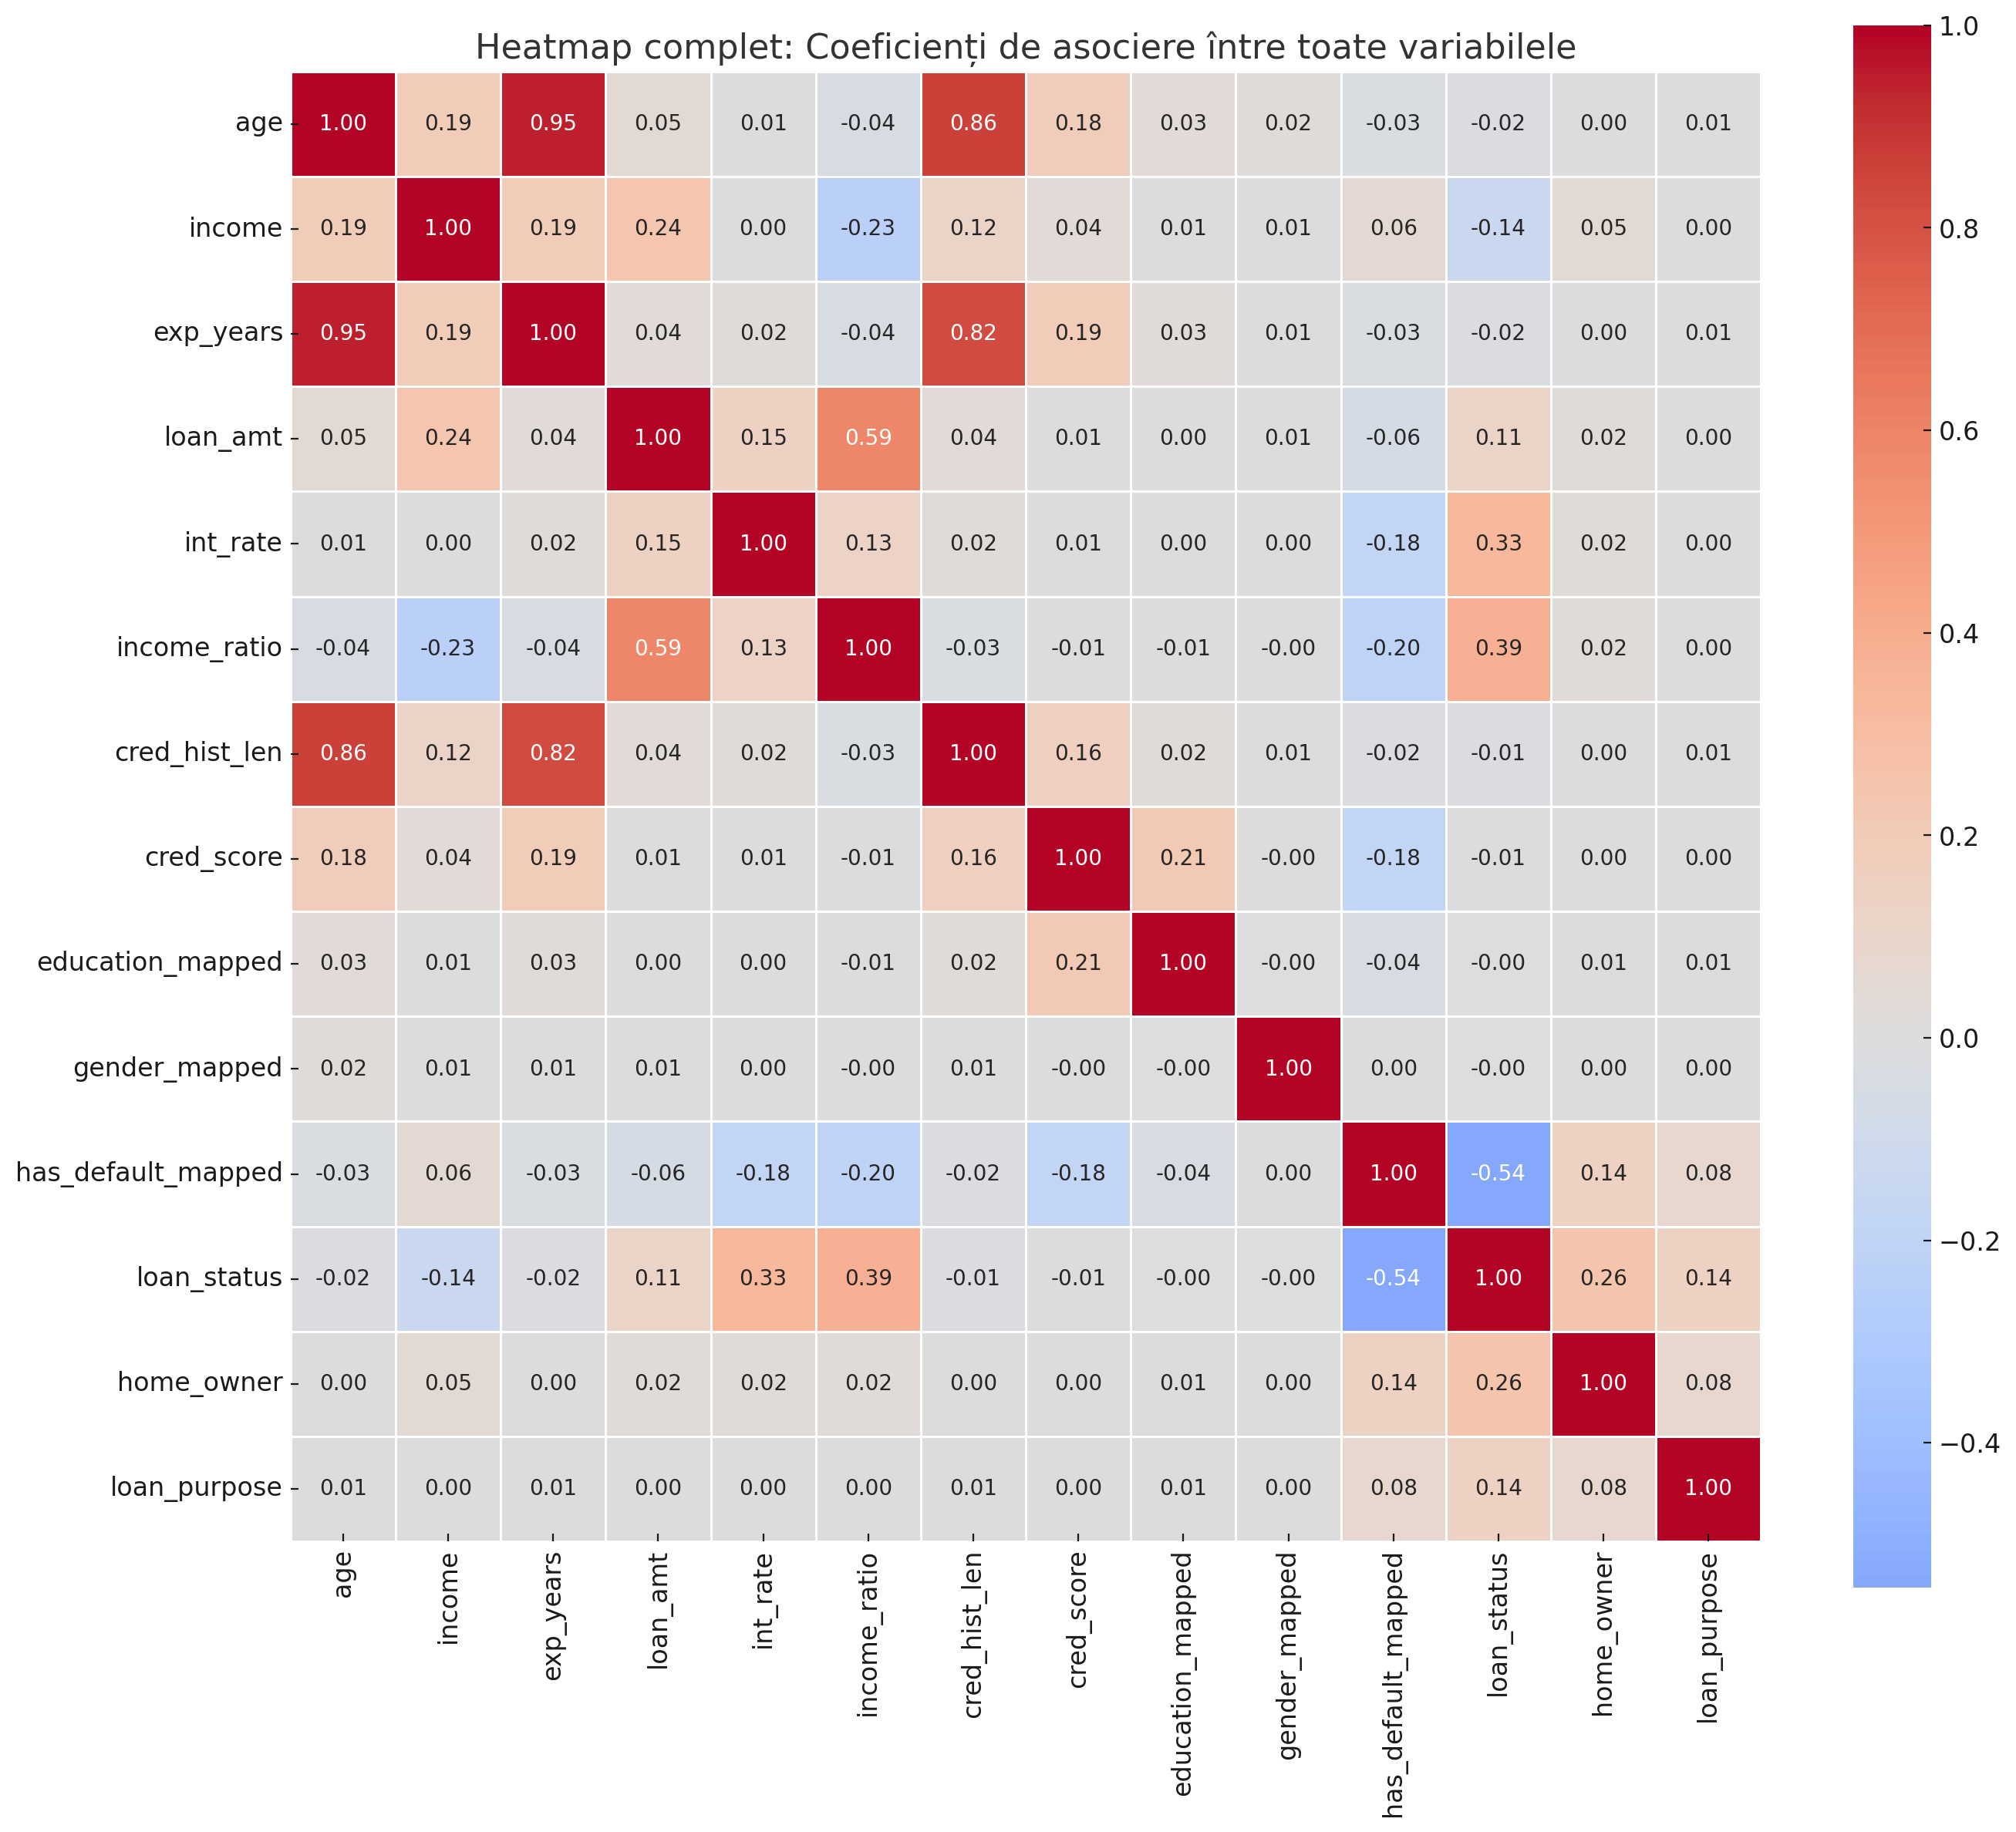

# V. Imputarile Finale

In [105]:
df_corr_imputed_fin = df.copy(deep=True)

### Imputarea coloanelor `age` `exp_years` `cred_hist_len` si `credit_score` folosind functia `impute_independent_group`

In [106]:
target_columns = ['age', 'exp_years', 'cred_hist_len', 'cred_score']

# Selectăm doar rândurile fără NaN
rows_not_missing = df_corr_imputed_fin[target_columns].notnull().all(axis=1)

# Calculăm media globală pentru fiecare coloană
global_mean = df_corr_imputed_fin.loc[rows_not_missing, target_columns].mean()

In [107]:
print(global_mean)

age              27.75
exp_years         5.34
cred_hist_len     5.87
cred_score      632.54
dtype: float64


In [108]:
def impute_independent_group(df, columns):
    """
    Impută fiecare valoare lipsa pe fiecare coloană dintr-un grup de coloane corelate (demonstrat anterior), folosind regresie
    liniară antrenată doar pe rânduri fără valori lipsa.

    Parametri:
        df: DataFrame-ul cu valori lipsa
        columns: listă cu numele coloanelor de imputat care am demonstrat ca sunt corelate intre ele

    Returnează:
        df (modificat) cu valorile imputate doar în rândurile cu NAN
    """
    df_copy = df.copy()

    # Rânduri unde toate variabilele din grup nu au NaN
    rows_with_all_values = df_copy[columns].notnull().all(axis=1)
    training_data = df_copy.loc[rows_with_all_values, columns]

    # Modele de regresie pentru fiecare variabilă
    models = {}
    for target_col in columns:
        predictors = [col for col in columns if col != target_col]
        predictors_train = training_data[predictors]
        target_train = training_data[target_col]

        model = LinearRegression().fit(predictors_train, target_train)
        models[target_col] = model

    # Imputare pentru fiecare coloană
    for target_col in columns:
        predictors = [col for col in columns if col != target_col]

        rows_to_impute = df_copy[target_col].isnull() & df_copy[predictors].notnull().all(axis=1)

        if rows_to_impute.any():
            predictors_for_impute = df_copy.loc[rows_to_impute, predictors]
            df_copy.loc[rows_to_impute, target_col] = models[target_col].predict(predictors_for_impute)

    return df_copy

In [109]:
df_corr_imputed_fin = impute_independent_group(df_corr_imputed_fin, columns=target_columns)

In [110]:
missing_values = df_corr_imputed_fin.isnull().sum()
print('Valori lipsă per coloană:')
print(missing_values)

Valori lipsă per coloană:
age               301
gender           2250
education        2250
income           2250
exp_years         346
home_owner       2250
loan_amt         2250
loan_purpose     2250
int_rate         2250
income_ratio     2250
cred_hist_len     349
cred_score        335
has_default      2250
loan_status         0
dtype: int64


In [111]:
# Înlocuim valorile lipsă rămase cu media
for col in target_columns:
    missing_idx = df_corr_imputed_fin[col].isnull()
    df_corr_imputed_fin.loc[missing_idx, col] = global_mean[col]

In [112]:
missing_values = df_corr_imputed_fin.isnull().sum()
print('Valori lipsă per coloană:')
print(missing_values)

Valori lipsă per coloană:
age                 0
gender           2250
education        2250
income           2250
exp_years           0
home_owner       2250
loan_amt         2250
loan_purpose     2250
int_rate         2250
income_ratio     2250
cred_hist_len       0
cred_score          0
has_default      2250
loan_status         0
dtype: int64


### Imputarea coloanelor `income` `loan_amt` si `income_ratio` folosind functia `impute_independent_group`

In [113]:
target_columns = ['income', 'income_ratio', 'loan_amt']

# Selectăm doar rândurile fara NAN
rows_not_missing = df_corr_imputed_fin[target_columns].notnull().all(axis=1)

# Calculăm media globală pentru fiecare coloană
global_mean = df_corr_imputed_fin.loc[rows_not_missing, target_columns].mean()

In [114]:
print(global_mean)

income         78,075.06
income_ratio        0.14
loan_amt        9,607.96
dtype: float64


In [115]:
df_corr_imputed_fin = impute_independent_group(df_corr_imputed_fin, columns=target_columns)

In [116]:
missing_values = df_corr_imputed_fin.isnull().sum()
print('Valori lipsă per coloană:')
print(missing_values)

Valori lipsă per coloană:
age                 0
gender           2250
education        2250
income            235
exp_years           0
home_owner       2250
loan_amt          240
loan_purpose     2250
int_rate         2250
income_ratio      228
cred_hist_len       0
cred_score          0
has_default      2250
loan_status         0
dtype: int64


In [117]:
# Înlocuim valorile lipsă rămase cu media
for col in target_columns:
    missing_idx = df_corr_imputed_fin[col].isnull()
    df_corr_imputed_fin.loc[missing_idx, col] = global_mean[col]

In [118]:
missing_values = df_corr_imputed_fin.isnull().sum()
print('Valori lipsă per coloană:')
print(missing_values)

Valori lipsă per coloană:
age                 0
gender           2250
education        2250
income              0
exp_years           0
home_owner       2250
loan_amt            0
loan_purpose     2250
int_rate         2250
income_ratio        0
cred_hist_len       0
cred_score          0
has_default      2250
loan_status         0
dtype: int64


### Imputare `int_rate` in functie de `loan_status` `loan_amt` si `income_ratio` folosind Random Forest Regressor




In [119]:
predictors = ['loan_status', 'loan_amt', 'income_ratio']
target = 'int_rate'

# Rânduri fara NAN pentru antrenare
mask_train = df_corr_imputed_fin[[target] + predictors].notnull().all(axis=1)
df_train = df_corr_imputed_fin.loc[mask_train, [target] + predictors].copy()

# Encodăm loan_status dacă e categorică
if df_train['loan_status'].dtype == 'object':
    le_status = LabelEncoder()
    df_train['loan_status'] = le_status.fit_transform(df_train['loan_status'])
else:
    le_status = None

# 4. Antrenăm modelul
X_train = df_train[predictors]
y_train = df_train[target]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Pregătim datele pentru prezicere
mask_impute = df_corr_imputed_fin[target].isnull() & df_corr_imputed_fin[predictors].notnull().all(axis=1)
df_pred = df_corr_imputed_fin.loc[mask_impute, predictors].copy()

# Encodăm și loan_status în test dacă e cazul
if le_status is not None:
    df_pred['loan_status'] = le_status.transform(df_pred['loan_status'])

# 6. Prezicem valorile lipsă
y_pred = model.predict(df_pred)
df_corr_imputed_fin.loc[mask_impute, target] = y_pred

In [120]:
missing_values = df_corr_imputed_fin.isnull().sum()
print('Valori lipsă per coloană:')
print(missing_values)

Valori lipsă per coloană:
age                 0
gender           2250
education        2250
income              0
exp_years           0
home_owner       2250
loan_amt            0
loan_purpose     2250
int_rate            0
income_ratio        0
cred_hist_len       0
cred_score          0
has_default      2250
loan_status         0
dtype: int64


### Imputarea coloanei `has_default` in functie de `loan_status` folosind valoarea modala pe categorii

In [121]:
# Calculează modul lui has_default în funcție de loan_status
mode_by_status = df_corr_imputed_fin.groupby('loan_status')['has_default'].agg(lambda x: x.mode().iloc[0])

# Selectează rândurile unde has_default este NAN
missing_rows = df_corr_imputed_fin['has_default'].isnull()

# Imputează has_default cu modul dupa loan_status
df_corr_imputed_fin.loc[missing_rows, 'has_default'] = df_corr_imputed_fin.loc[missing_rows, 'loan_status'].map(mode_by_status)

In [122]:
missing_values = df_corr_imputed_fin.isnull().sum()
print('Valori lipsă per coloană:')
print(missing_values)

Valori lipsă per coloană:
age                 0
gender           2250
education        2250
income              0
exp_years           0
home_owner       2250
loan_amt            0
loan_purpose     2250
int_rate            0
income_ratio        0
cred_hist_len       0
cred_score          0
has_default         0
loan_status         0
dtype: int64


### Imputare `home_owner` in functie de modul dupa grupe folosind variabilele categoriale `loan_status` si `has_default`.

In [123]:
# Calculează modulul pentru fiecare grup loan_status + has_default
mode_by_group = (
    df_corr_imputed_fin
    .groupby(['loan_status', 'has_default'])['home_owner']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
    .reset_index()
    .rename(columns={'home_owner': 'home_owner_mode'})
)

# Fă merge cu modulul pe dataframe-ul original
df_corr_imputed_fin = df_corr_imputed_fin.merge(
    mode_by_group,
    on=['loan_status', 'has_default'],
    how='left'
)

# Imputează valorile NaN din home_owner
df_corr_imputed_fin['home_owner'] = df_corr_imputed_fin['home_owner'].fillna(df_corr_imputed_fin['home_owner_mode'])

# Șterge coloana auxiliară
df_corr_imputed_fin.drop(columns='home_owner_mode', inplace=True)


In [124]:
missing_values = df_corr_imputed_fin.isnull().sum()
print('Valori lipsă per coloană:')
print(missing_values)

Valori lipsă per coloană:
age                 0
gender           2250
education        2250
income              0
exp_years           0
home_owner          0
loan_amt            0
loan_purpose     2250
int_rate            0
income_ratio        0
cred_hist_len       0
cred_score          0
has_default         0
loan_status         0
dtype: int64


### Imputarea coloanei `loan_purpose` in functie de `loan_status`

In [125]:
# Calculează modul lui loan_purpose în funcție de loan_status
mode_by_status = df_corr_imputed_fin.groupby('loan_status')['loan_purpose'].agg(lambda x: x.mode().iloc[0])

# Selectează rândurile unde loan_purpose este NAN
missing_rows = df_corr_imputed_fin['loan_purpose'].isnull()

# Imputează în funcție de loan_status
df_corr_imputed_fin.loc[missing_rows, 'loan_purpose'] = df_corr_imputed_fin.loc[missing_rows, 'loan_status'].map(mode_by_status)

In [126]:
missing_values = df_corr_imputed_fin.isnull().sum()
print('Valori lipsă per coloană:')
print(missing_values)

Valori lipsă per coloană:
age                 0
gender           2250
education        2250
income              0
exp_years           0
home_owner          0
loan_amt            0
loan_purpose        0
int_rate            0
income_ratio        0
cred_hist_len       0
cred_score          0
has_default         0
loan_status         0
dtype: int64


### Imputarea coloanei `education` in functie de `credit_score`

In [127]:
df_corr_imputed_fin['cred_score_groups'] = pd.qcut(df_corr_imputed_fin['cred_score'], q=4)

In [128]:
# Calculează modul lui education în funcție de cred_score_groups
mode_by_status = df_corr_imputed_fin.groupby('cred_score_groups')['education'].agg(lambda x: x.mode().iloc[0])

# Selectează rândurile unde education este NAN
missing_rows = df_corr_imputed_fin['education'].isnull()

# Imputează education cu modul dupa cred_score_groups
df_corr_imputed_fin.loc[missing_rows, 'education'] = df_corr_imputed_fin.loc[missing_rows, 'cred_score_groups'].map(mode_by_status)

<ipython-input-128-b48cc1e9b384>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_by_status = df_corr_imputed_fin.groupby('cred_score_groups')['education'].agg(lambda x: x.mode().iloc[0])


In [129]:
missing_values = df_corr_imputed_fin.isnull().sum()
print('Valori lipsă per coloană:')
print(missing_values)

Valori lipsă per coloană:
age                     0
gender               2250
education               0
income                  0
exp_years               0
home_owner              0
loan_amt                0
loan_purpose            0
int_rate                0
income_ratio            0
cred_hist_len           0
cred_score              0
has_default             0
loan_status             0
cred_score_groups       0
dtype: int64


### Imputare `gender` in functie de toate variabilele numerice mai putin `int_rate` si `income_ratio`

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Lista de coloane numerice
numerical_columns = [
    'age', 'income', 'exp_years', 'loan_amt', 'cred_hist_len', 'cred_score']
target = 'gender'

# Selectăm rândurile cu date complete pentru antrenare
mask_train = df_corr_imputed_fin[target].notnull() & df_corr_imputed_fin[numerical_columns].notnull().all(axis=1)
df_train = df_corr_imputed_fin.loc[mask_train, [target] + numerical_columns].copy()

# Label encoding pentru gender
le_gender = LabelEncoder()
df_train[target] = le_gender.fit_transform(df_train[target])

# Antrenăm clasificatorul
X_train = df_train[numerical_columns]
y_train = df_train[target]

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Selectăm rândurile de imputat
mask_impute = df_corr_imputed_fin[target].isnull() & df_corr_imputed_fin[numerical_columns].notnull().all(axis=1)
df_pred = df_corr_imputed_fin.loc[mask_impute, numerical_columns].copy()

# Prezicem valorile lipsă
y_pred = clf.predict(df_pred)
df_corr_imputed_fin.loc[mask_impute, target] = le_gender.inverse_transform(y_pred)


In [131]:
missing_values = df_corr_imputed_fin.isnull().sum()
print('Valori lipsă per coloană:')
print(missing_values)

Valori lipsă per coloană:
age                  0
gender               0
education            0
income               0
exp_years            0
home_owner           0
loan_amt             0
loan_purpose         0
int_rate             0
income_ratio         0
cred_hist_len        0
cred_score           0
has_default          0
loan_status          0
cred_score_groups    0
dtype: int64


# VI. Calcularea erorii de imputare

In [132]:
# Inițializăm dicționare pentru erori
numerical_errors_per_var = defaultdict(list)
categorical_errors_per_var = defaultdict(list)

# Parcurgem missing_map
for idx, cols in missing_map.items():
    for col in cols:
        true_val = df_original.loc[idx, col]
        imputed_val = df_corr_imputed_fin.loc[idx, col]

        if pd.api.types.is_numeric_dtype(df_corr_imputed_fin[col]):
            col_range = df_original[col].max() - df_original[col].min()
            if col_range == 0:
                continue
            error = abs(true_val - imputed_val) / col_range
            numerical_errors_per_var[col].append(error)
        else:
            error = 0 if true_val == imputed_val else 1
            categorical_errors_per_var[col].append(error)

# Calculăm media erorilor pentru fiecare coloană
numerical_errors_summary = {k: np.mean(v) for k, v in numerical_errors_per_var.items()}
categorical_errors_summary = {k: np.mean(v) for k, v in categorical_errors_per_var.items()}
categorical_accuracy_summary = {k: 1 - v for k, v in categorical_errors_summary.items()}

In [133]:
print(" Eroare normalizată pe variabile numerice:")
for var, err in numerical_errors_summary.items():
    print(f"  {var}: {err:.2%}")

print("\n Acuratețe pe variabile categorice:")
for var, acc in categorical_accuracy_summary.items():
    print(f"  {var}: {acc:.2%}")

 Eroare normalizată pe variabile numerice:
  age: 4.48%
  int_rate: 15.03%
  income_ratio: 8.42%
  cred_hist_len: 5.73%
  exp_years: 7.26%
  loan_amt: 6.36%
  income: 7.11%
  cred_score: 8.59%

 Acuratețe pe variabile categorice:
  education: 33.38%
  home_owner: 53.02%
  has_default: 72.00%
  loan_purpose: 23.78%
  gender: 52.71%


# VII. Regresie Logistica

Copiem baza de date pe care am imputat-o la pasul anterior in `df_ready`. De acum vom lucra numai cu acest data frame.

In [134]:
df_ready = df_corr_imputed_fin.copy(deep=True)

Verificam ca nu mai exista valori lipsa:

In [135]:
missing_values = df_ready.isnull().sum()
print('Valori lipsă per coloană:')
print(missing_values)

Valori lipsă per coloană:
age                  0
gender               0
education            0
income               0
exp_years            0
home_owner           0
loan_amt             0
loan_purpose         0
int_rate             0
income_ratio         0
cred_hist_len        0
cred_score           0
has_default          0
loan_status          0
cred_score_groups    0
dtype: int64


Eliminam coloana `cred_score_groups` folosita la pasul anterior de imputare si de care nu mai avem nevoie.

In [136]:
df_ready = df_ready.drop(columns='cred_score_groups')

In [137]:
df_ready.head()

age  gender    education    income  exp_years home_owner  loan_amt  \
0 22.00  female       Master 71,948.00       0.00       RENT 35,000.00   
1 21.00  female  High School 12,282.00       0.00        OWN  1,000.00   
2 25.00  female  High School 12,438.00       3.00   MORTGAGE  5,500.00   
3 23.00  female     Bachelor 79,753.00       0.00       RENT 35,000.00   
4 23.75    male       Master 66,135.00       1.00       RENT 35,000.00   

  loan_purpose  int_rate  income_ratio  cred_hist_len  cred_score has_default  \
0     PERSONAL     16.02          0.40           3.00      561.00          No   
1    EDUCATION     11.14          0.08           2.00      504.00         Yes   
2      MEDICAL     12.87          0.40           3.00      635.00          No   
3      MEDICAL     15.23          0.40           2.00      675.00          No   
4      MEDICAL     14.27          0.40           4.00      586.00          No   

   loan_status  
0            1  
1            0  
2            1  
3            1  
4            1

### Pregatirea Bazei de Date (Creare Variabile Dummy)

Pregatim baza de date pentru realizarea unui model de regresie logistica. primul pas este de a transforma toate variabilele categoriale (`education`, `home_owner`, `loan_purpose`) in variabile dummy.

In [138]:
# Transformarea variabilelor categoriale în variabile dummy
df_ready = pd.get_dummies(df_ready, columns=['education', 'home_owner', 'loan_purpose'], drop_first=False)

Convertim toatel coloanele noi create in urma aplicarii functiei `.get_dummies` din `bool` in `int`

In [139]:
cols_to_convert = [
    'education_Bachelor', 'education_Doctorate', 'education_High School', 'education_Master',
    'home_owner_MORTGAGE', 'education_Associate',
    'home_owner_OTHER', 'home_owner_OWN', 'home_owner_RENT',
    'loan_purpose_EDUCATION', 'loan_purpose_HOMEIMPROVEMENT',
    'loan_purpose_MEDICAL', 'loan_purpose_PERSONAL', 'loan_purpose_VENTURE', 'loan_purpose_DEBTCONSOLIDATION'
]

df_ready[cols_to_convert] = df_ready[cols_to_convert].astype(int)

Mapam cu 0 si 1 variabilele binare `gender` si `has_default`

In [140]:
# Mapare valori pentru coloana 'gender' și 'has_default'
gender_map = {
    'female': 0,
    'male': 1
}

has_default_map = {
    'No': 0,
    'Yes': 1
}

df_ready['gender'] = df_ready['gender'].map(gender_map)
df_ready['has_default'] = df_ready['has_default'].map(has_default_map)

In [141]:
df_ready.head()

age  gender    income  exp_years  loan_amt  int_rate  income_ratio  \
0 22.00       0 71,948.00       0.00 35,000.00     16.02          0.40   
1 21.00       0 12,282.00       0.00  1,000.00     11.14          0.08   
2 25.00       0 12,438.00       3.00  5,500.00     12.87          0.40   
3 23.00       0 79,753.00       0.00 35,000.00     15.23          0.40   
4 23.75       1 66,135.00       1.00 35,000.00     14.27          0.40   

   cred_hist_len  cred_score  has_default  ...  home_owner_MORTGAGE  \
0           3.00      561.00            0  ...                    0   
1           2.00      504.00            1  ...                    0   
2           3.00      635.00            0  ...                    1   
3           2.00      675.00            0  ...                    0   
4           4.00      586.00            0  ...                    0   

   home_owner_OTHER  home_owner_OWN  home_owner_RENT  \
0                 0               0                1   
1                 0               1                0   
2                 0               0                0   
3                 0               0                1   
4                 0               0                1   

   loan_purpose_DEBTCONSOLIDATION  loan_purpose_EDUCATION  \
0                               0                       0   
1                               0                       1   
2                               0                       0   
3                               0                       0   
4                               0                       0   

   loan_purpose_HOMEIMPROVEMENT  loan_purpose_MEDICAL  loan_purpose_PERSONAL  \
0                             0                     0                      1   
1                             0                     0                      0   
2                             0                     1                      0   
3                             0                     1                      0   
4                             0                     1                      0   

   loan_purpose_VENTURE  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 26 columns]

Vizualizam toate coloanele dupa pregatirea bazei de date:

In [142]:
pd.DataFrame(df_ready.columns, columns=['Coloane'])

Coloane
0                              age
1                           gender
2                           income
3                        exp_years
4                         loan_amt
5                         int_rate
6                     income_ratio
7                    cred_hist_len
8                       cred_score
9                      has_default
10                     loan_status
11             education_Associate
12              education_Bachelor
13             education_Doctorate
14           education_High School
15                education_Master
16             home_owner_MORTGAGE
17                home_owner_OTHER
18                  home_owner_OWN
19                 home_owner_RENT
20  loan_purpose_DEBTCONSOLIDATION
21          loan_purpose_EDUCATION
22    loan_purpose_HOMEIMPROVEMENT
23            loan_purpose_MEDICAL
24           loan_purpose_PERSONAL
25            loan_purpose_VENTURE

Ne asiguram ca toate coloanele sunt fie de tip `int` fie de tip `float`

In [143]:
df_ready_info = df_ready.dtypes.reset_index()
df_ready_info.columns = ['Coloana', 'Tipul de date']
print(df_ready_info)

                           Coloana Tipul de date
0                              age       float64
1                           gender         int64
2                           income       float64
3                        exp_years       float64
4                         loan_amt       float64
5                         int_rate       float64
6                     income_ratio       float64
7                    cred_hist_len       float64
8                       cred_score       float64
9                      has_default         int64
10                     loan_status         int64
11             education_Associate         int64
12              education_Bachelor         int64
13             education_Doctorate         int64
14           education_High School         int64
15                education_Master         int64
16             home_owner_MORTGAGE         int64
17                home_owner_OTHER         int64
18                  home_owner_OWN         int64
19                 h

### VII. 1. Regresia Logistica cu toate variabilele

Pentru început, vom antrena un model de regresie logistică utilizând toate variabilele disponibile, cu excepția variabilelor dummy corespunzătoare categoriilor cu cea mai mică frecvență din fiecare dintre cele trei variabile categoriale: `education`, `home_owner` și `loan_purpose`. În cazul utilizării variabilelor dummy într-un model, includerea tuturor acestora este redundantă, deoarece absența valorii 1 pentru toate variabilele dummy implică automat apartenența la categoria omisă. Prin urmare, am ales să excludem din model următoarele variabile dummy, corespunzătoare celor mai puțin frecvente categorii: `education_Doctorate`, `home_owner_OTHER` și `loan_purpose_HOMEIMPROVEMENT`.

In [144]:
# Pasul 1: Împărțirea în train/test
from sklearn.model_selection import train_test_split

X = df_ready.drop(columns=['loan_status', 'education_Doctorate', 'home_owner_OTHER', 'loan_purpose_HOMEIMPROVEMENT'])
y = df_ready['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Pentru variabilele numerice și continue (`age`, `income`, `exp_years`, `loan_amt`, `int_rate`, `income_ratio`, `cred_hist_len`, `cred_score`), am aplicat funcția `StandardScaler` pentru a le aduce la o scală comună.

Standardizarea transformă valorile astfel încât fiecare variabilă să aibă media 0 și abaterea standard 1, îmbunătățind performanța generală a modelului.

In [145]:
from sklearn.preprocessing import StandardScaler

# Coloanele pe care vrem să le standardizăm
cols_to_scale = ['age', 'income', 'exp_years', 'loan_amt', 'int_rate',
                 'income_ratio', 'cred_hist_len', 'cred_score']

# Inițializare scaler
scaler = StandardScaler()

# Fit și transform doar pe coloanele selectate
X_train_scaled_part = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled_part = scaler.transform(X_test[cols_to_scale])

# Conversie în DataFrame cu aceleași nume de coloane
X_train_scaled_part = pd.DataFrame(X_train_scaled_part, columns=cols_to_scale, index=X_train.index)
X_test_scaled_part = pd.DataFrame(X_test_scaled_part, columns=cols_to_scale, index=X_test.index)

# Înlocuim coloanele standardizate în setul original
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[cols_to_scale] = X_train_scaled_part
X_test_scaled[cols_to_scale] = X_test_scaled_part

In [146]:
# Pasul 2: Antrenarea modelului logistic
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [147]:
import statsmodels.api as sm
import pandas as pd

# Transformăm X_train_scaled într-un DataFrame cu aceleași coloane și index
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

# Adăugăm constanta (interceptul)
X_train_sm = sm.add_constant(X_train_scaled_df)

# Construim și antrenăm modelul
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Afișăm rezumatul cu numele variabilelor
print(result.summary())

         Current function value: 0.209538
         Iterations: 35


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                36000
Model:                          Logit   Df Residuals:                    35977
Method:                           MLE   Df Model:                           22
Date:                Thu, 05 Jun 2025   Pseudo R-squ.:                  0.6042
Time:                        12:53:09   Log-Likelihood:                -7543.4
converged:                      False   LL-Null:                       -19057.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.3127      0.409     -0.765      0.444      -1.114       0.489
age                                0.1505      0.070      2.150      0.

In [148]:
# Pasul 3: Evaluare model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error
import numpy as np

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Clasificare
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Erori
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("RMSE:", rmse)
print("MAE:", mae)

Accuracy: 0.25055555555555553
Confusion Matrix:
 [[1261 5729]
 [1016  994]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.18      0.27      6990
           1       0.15      0.49      0.23      2010

    accuracy                           0.25      9000
   macro avg       0.35      0.34      0.25      9000
weighted avg       0.46      0.25      0.26      9000

RMSE: 0.8657045942147035
MAE: 0.7494444444444445


Din rezultatele modelului de regresie logistică observăm că există o multitudine de coeficienți nesemnificativi. Din matricea de confuzie reiese că **acuratețea generală** a modelului în clasificarea cererilor de împrumut ca fiind aprobate sau respinse este de doar **25%**, ceea ce indică o performanță extrem de slabă.

**Precision Clasa 0** = Din toate cele 2277 de cereri pe care modelul le-a prezis ca fiind respinse, doar 1261 au fost cu adevărat respinse = 0.55

-> Doar 55% din respingerile estimate sunt cu adevarat respingeri

**Recall Clasa 0** = Din totalul de 6990 cereri care au fost realmente respinse, modelul a reușit să identifice corect doar 1261 = 0.18

-> Doar 18% din respingerile reale au fost detectate corect


**Precision Clasa 1** = Din toate cele 6723 cereri estimate ca acceptate, dar doar 994 dintre ele chiar au fost acceptate în realitate = 0.15

-> Doar 15% dintre aprobari sunt corecte.


**Recall Clasa 1** = Din cele 2010 cereri care au fost cu adevărat acceptate, modelul a reușit să le identifice corect pe 994 = 0.49


-> 49% dintre aprobările reale au fost detectate corect de model.

Statisticile de precision si recall pe ambele clase ne indică faptul că modelul are dificultăți semnificative în a face distincția între cele două clase.

### VII. 2. Regresia Logistica cu Feature Selection

În etapa de feature selection, pentru a îmbunătăți performanța modelului de regresie logistică, am decis să eliminăm variabilele care prezintă multicoliniaritate — adică acele variabile care sunt puternic corelate între ele și, prin urmare, pot introduce redundanță și instabilitate în model.

Analizând heatmap-ul matricii de corelație, observăm un grup de trei variabile puternic corelate: age, exp_years și cred_hist_len. Dintre acestea, am optat să păstrăm doar variabila exp_years, considerând-o cea mai reprezentativă pentru experiența financiară a aplicantului.

De asemenea, am constatat că variabila income_ratio este calculată pe baza loan_amt și income. Pentru a evita redundanța, am decis să păstrăm doar income_ratio, întrucât combină informația din celelalte două variabile.

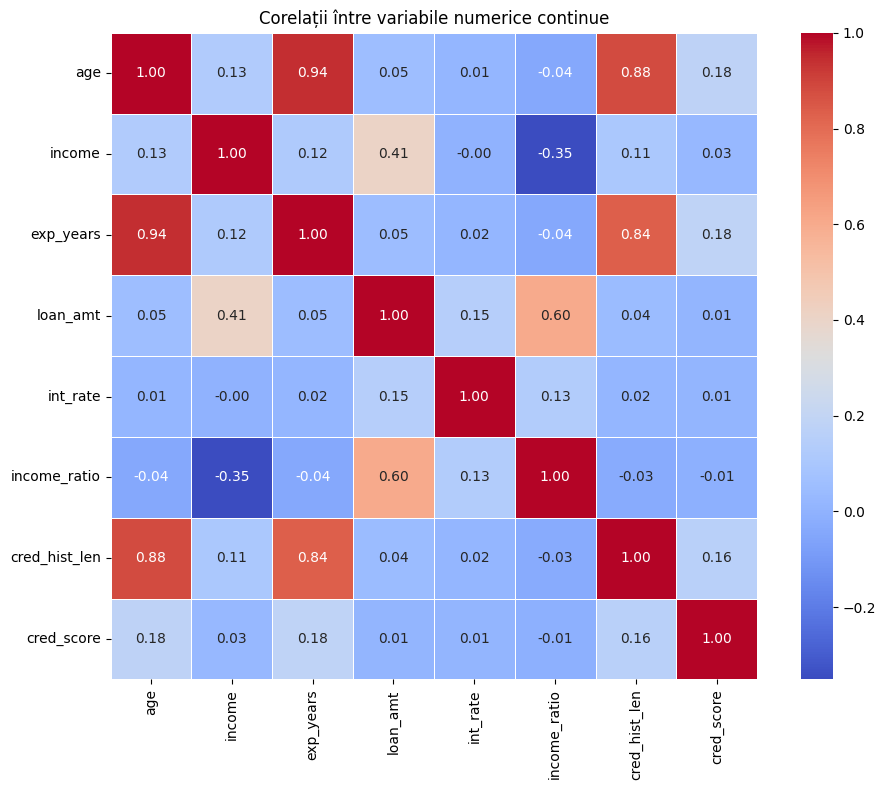

In [149]:
numerical_columns = [
    'age', 'income', 'exp_years', 'loan_amt', 'int_rate',
    'income_ratio', 'cred_hist_len', 'cred_score'
]

# Calculăm matricea de corelație Pearson
corr_matrix = df_ready[numerical_columns].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Corelații între variabile numerice continue")
plt.tight_layout()
plt.show()

In [150]:
# Pasul 1: Împărțirea în train/test
from sklearn.model_selection import train_test_split

X = df_ready.drop(columns=['loan_status', 'education_Doctorate', 'home_owner_OTHER', 'loan_purpose_HOMEIMPROVEMENT','income', 'loan_amt','age','cred_hist_len'])
y = df_ready['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Coloanele pe care vrem să le standardizăm
cols_to_scale = ['exp_years', 'int_rate', 'income_ratio', 'cred_score']

# Inițializare scaler
scaler = StandardScaler()

# Aplicare StandardScaler doar pe coloanele alese
X_train_scaled_part = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled_part = scaler.transform(X_test[cols_to_scale])

# Convertim rezultatul în DataFrame cu aceleași coloane și index
X_train_scaled_part = pd.DataFrame(X_train_scaled_part, columns=cols_to_scale, index=X_train.index)
X_test_scaled_part = pd.DataFrame(X_test_scaled_part, columns=cols_to_scale, index=X_test.index)

# Copiem seturile originale și înlocuim coloanele standardizate
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[cols_to_scale] = X_train_scaled_part
X_test_scaled[cols_to_scale] = X_test_scaled_part

In [152]:
# Pasul 2: Antrenarea modelului logistic
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [153]:
import statsmodels.api as sm
import pandas as pd

# Transformăm X_train_scaled într-un DataFrame cu aceleași coloane și index
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

# Adăugăm constanta (interceptul)
X_train_sm = sm.add_constant(X_train_scaled_df)

# Construim și antrenăm modelul
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Afișăm rezumatul cu numele variabilelor
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.216551
         Iterations 29
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                36000
Model:                          Logit   Df Residuals:                    35981
Method:                           MLE   Df Model:                           18
Date:                Thu, 05 Jun 2025   Pseudo R-squ.:                  0.5909
Time:                        12:53:10   Log-Likelihood:                -7795.8
converged:                       True   LL-Null:                       -19057.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.2627      0.387     -0.678    

In [154]:
# Pasul 3: Evaluare model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error
import numpy as np

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Clasificare
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Erori
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("RMSE:", rmse)
print("MAE:", mae)

Accuracy: 0.7766666666666666
Confusion Matrix:
 [[6990    0]
 [2010    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.87      6990
           1       0.00      0.00      0.00      2010

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.60      0.78      0.68      9000

RMSE: 0.47258156262526085
MAE: 0.22333333333333333


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Analizând matricea de confuzie pentru modelul cu feature selection, observăm că modelul obține o acuratețe de 77,67%, însă această performanță este înșelătoare. Modelul clasifică toate observațiile din setul de test ca aparținând clasei 0 (cereri respinse).

Această situație este cauzată de dezechilibrul semnificativ al claselor din setul de date: conform statisticilor descriptive, 77,78% dintre cereri sunt respinse, iar doar 22,22% sunt aprobate. Pentru a corecta acest dezechilibru vom aplica o metodă dedicată acestei probleme si anume SMOTE (Synthetic Minority Over-sampling Technique).

### VII. 3. Regresia Logistica cu Feature Selection + SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE este o metodă folosită pentru a echilibra seturile de date dezechilibrate, prin generarea de noi exemple sintetice pentru clasa minoritară.

SMOTE creează artificial puncte noi, plasându-le între o observație reală și vecinii ei apropiați din aceeași clasă. Astfel, crește diversitatea exemplelor minoritare, ajutând modelul să învețe mai bine caracteristicile acestei clase și să evite dezechilibrele în predicții.

In [155]:
# 1. Resampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import pandas as pd
import statsmodels.api as sm

# SMOTE resampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 2. Standardizare DOAR pe anumite coloane
cols_to_scale = ['exp_years', 'int_rate', 'income_ratio', 'cred_score']
scaler = StandardScaler()

# Aplicare doar pe coloanele selectate
X_train_scaled_part = scaler.fit_transform(X_train_resampled[cols_to_scale])
X_train_scaled_part = pd.DataFrame(X_train_scaled_part, columns=cols_to_scale, index=X_train_resampled.index)

# Înlocuirea în setul complet
X_train_scaled = X_train_resampled.copy()
X_train_scaled[cols_to_scale] = X_train_scaled_part

# 3. Pregătire pentru statsmodels
X_train_sm = sm.add_constant(X_train_scaled)

# 4. Logistic regression cu statsmodels
logit_model = sm.Logit(y_train_resampled, X_train_sm)
result = logit_model.fit()
print(result.summary())

         Current function value: 0.170191
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                56020
Model:                          Logit   Df Residuals:                    56001
Method:                           MLE   Df Model:                           18
Date:                Thu, 05 Jun 2025   Pseudo R-squ.:                  0.7545
Time:                        12:53:13   Log-Likelihood:                -9534.1
converged:                      False   LL-Null:                       -38830.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              8.5892      0.239     35.893      0.000       8.120       9.058
gende

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [156]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error
import numpy as np

# Predictii pe test set (care e DOAR scalat, nu și resampled!)
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Clasificare
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Erori
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("RMSE:", rmse)
print("MAE:", mae)

Accuracy: 0.8934444444444445
Confusion Matrix:
 [[6549  441]
 [ 518 1492]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      6990
           1       0.77      0.74      0.76      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.84      0.84      9000
weighted avg       0.89      0.89      0.89      9000

RMSE: 0.3264284845958691
MAE: 0.10655555555555556


Observam din outputul de regresie ca in afar de variabila has_deafult modelul are toti coeficientii semnificativi. Pseudo R Square a inregistrat si el o imbunatarire, de la 0.59 la modelul trecut la 0.75 pentru acest model.

Din matricea de confuzie observam cel bun scor al acuratetii de pana acum si anume 89.34%.



Precision Clasa 0 = 93% dintre respingerile estimate sunt cu adevărat respingeri

Recall Clasa 0 = 94% dintre respingerile reale au fost detectate corect

Precision Clasa 1 = 77% dintre aprobările estimate sunt corecte

Recall Clasa 1 = 74% dintre aprobările reale au fost detectate corect de model

Din statisticile de recall si precision observam ca modelul are o performanta mai slaba in estimarea clasei minoritare.

### VII. 4. Regresia Logistica cu Feature Selection (- has_default) + SMOTE (sintetic oversampling )

Mai departe am estimat acelasi model ca mai devreme, fara variabila has_default intrucat era singura nesemnificativa. Din outputul de regresie si din matricea de confuzie observam ca nu s-a schimbat nimic.

In [157]:
# Pasul 1: Împărțirea în train/test
from sklearn.model_selection import train_test_split

X = df_ready.drop(columns=['loan_status', 'education_Doctorate', 'home_owner_OTHER', 'loan_purpose_HOMEIMPROVEMENT','income', 'loan_amt','age','cred_hist_len', 'has_default'])
y = df_ready['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
# 1. Resampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import pandas as pd
import statsmodels.api as sm

# SMOTE resampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 2. Standardizare DOAR pe anumite coloane
cols_to_scale = ['exp_years', 'int_rate', 'income_ratio', 'cred_score']
scaler = StandardScaler()

# Aplicăm scalarea doar pe coloanele dorite
X_scaled_part = scaler.fit_transform(X_train_resampled[cols_to_scale])
X_scaled_part_df = pd.DataFrame(X_scaled_part, columns=cols_to_scale, index=X_train_resampled.index)

# Combinăm datele scalate cu cele neschimbate
X_train_scaled_resampled = X_train_resampled.copy()
X_train_scaled_resampled[cols_to_scale] = X_scaled_part_df

# 3. Pregătire pentru modelul statsmodels
X_train_sm = sm.add_constant(X_train_scaled_resampled)

# 4. Antrenare model logistic
logit_model = sm.Logit(y_train_resampled, X_train_sm)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.298781
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                56020
Model:                          Logit   Df Residuals:                    56002
Method:                           MLE   Df Model:                           17
Date:                Thu, 05 Jun 2025   Pseudo R-squ.:                  0.5690
Time:                        12:53:13   Log-Likelihood:                -16738.
converged:                       True   LL-Null:                       -38830.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              7.8288      0.152     51.348     

In [159]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error
import numpy as np

# Predictii pe test set (care e DOAR scalat, nu și resampled!)
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Clasificare
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Erori
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("RMSE:", rmse)
print("MAE:", mae)

Accuracy: 0.8934444444444445
Confusion Matrix:
 [[6549  441]
 [ 518 1492]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      6990
           1       0.77      0.74      0.76      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.84      0.84      9000
weighted avg       0.89      0.89      0.89      9000

RMSE: 0.3264284845958691
MAE: 0.10655555555555556


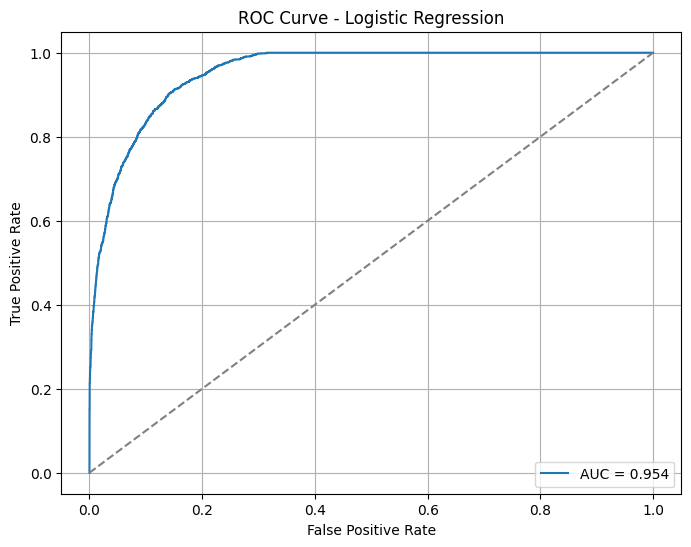

In [160]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilități pentru clasa pozitivă (loan_status = 1)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Curba ROC a modelului de regresie logistică arată o performanță foarte buna, cu o valoare AUC de 0.954.

Aceasta indică faptul că modelul are o capacitate foarte bună de a distinge între cele două clase, respectiv cererile de împrumut aprobate și cele respinse.

Forma curbei, apropiată de colțul din stânga sus, sugerează că modelul reușește să obțină o rată ridicată de clasificări corecte pentru cererile aprobate, menținând în același timp un număr scăzut de cazuri fals pozitive (cereri admise care in realitate ar trebui respinse).

# VIII. Arbori de decizie

####VIII. 1 Model cu toate variabilele

Pentru început, am antrenat un model de tip arbore decizional utilizând întregul set de variabile disponibile.

In [161]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separăm target-ul și predictorii
target = 'loan_status'
X_full = df_ready.drop(columns=[target])
X_full = X_full.select_dtypes(include=[np.number])  # doar variabile numerice
y = df_ready[target]

# Eliminăm rândurile cu NaN
mask = X_full.notnull().all(axis=1) & y.notnull()
X_full = X_full.loc[mask]
y = y.loc[mask]

# Împărțim în train/test
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, stratify=y, random_state=42)

# Antrenăm modelul
tree_all = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
tree_all.fit(X_train, y_train)

# Evaluăm
y_pred_all = tree_all.predict(X_test)
acc_all = accuracy_score(y_test, y_pred_all)
print(f"Acuratețe model cu toate variabilele: {acc_all:.4f}")

Acuratețe model cu toate variabilele: 0.9094


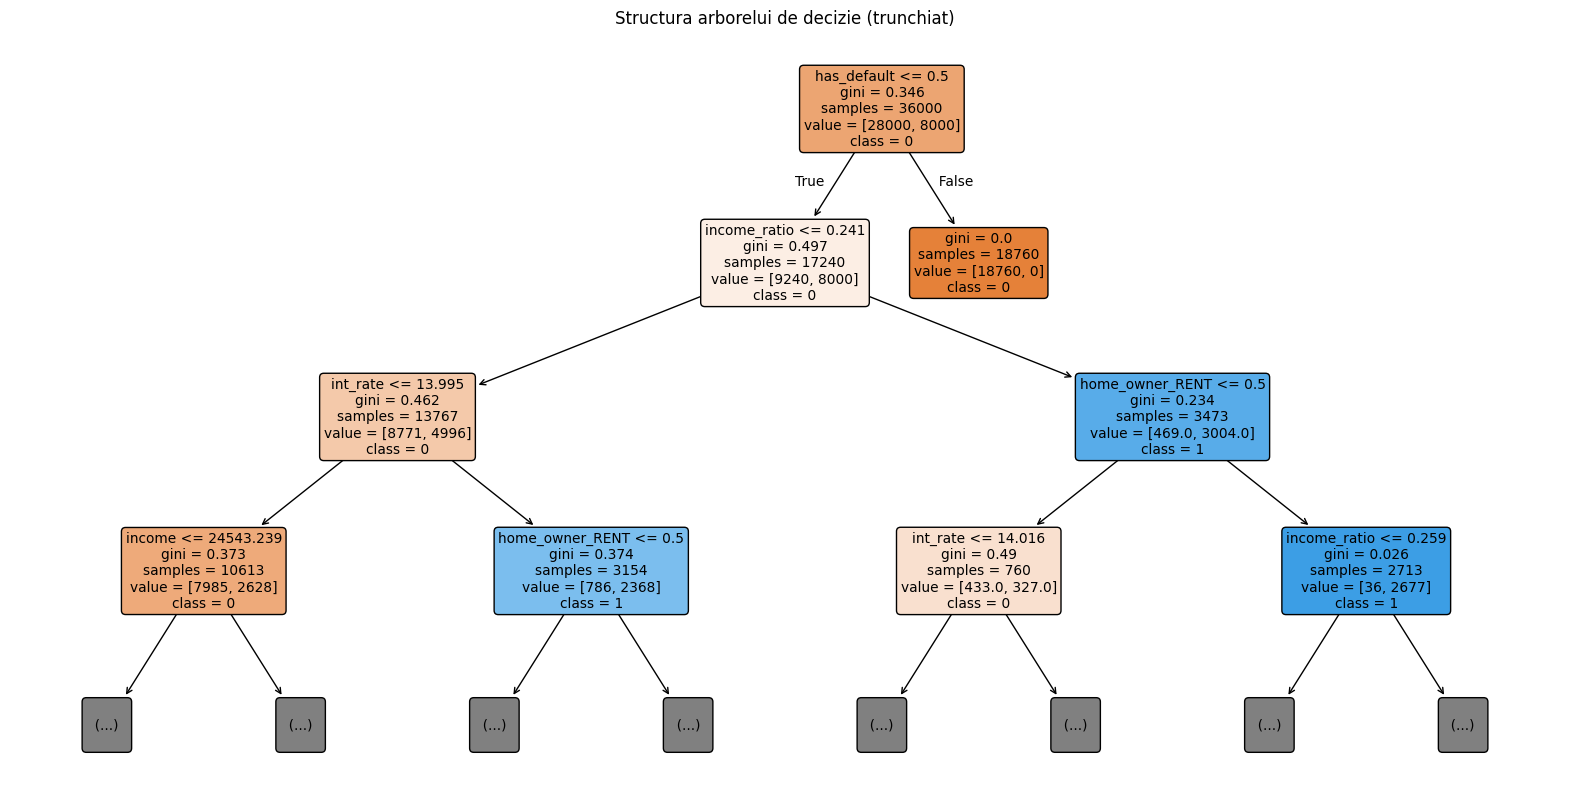

In [162]:
#Schema arborelui

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree_all,
          feature_names=X_full.columns,
          class_names=[str(cls) for cls in tree_all.classes_],  # <- conversie în string
          filled=True,
          max_depth=3,
          rounded=True)

plt.title("Structura arborelui de decizie (trunchiat)")
plt.show()

Conform arborelui decizional partial afisat variabila cu cel mai mare impact în luarea deciziei este has_default, aflată în nodul rădăcină.

Dacă solicitantul a avut un istoric de default (has_default > 0.5), modelul respinge automat cererea.

Pentru cei fără default anterior, decizia se bazează pe alte variabile, în special income_ratio (raportul dintre rată și venit), int_rate (rata dobânzii), income, home_owner_RENT și loan_purpose_MEDICAL.

Spre exemplu, dacă un client nu are default în trecut, are un raport income_ratio mic (adică venitul este suficient în raport cu suma solicitată) și dobânda (int_rate) este mică, atunci șansele de aprobare a împrumutului cresc.

Nodurile albastre din arbore corespund claselor pozitive (cereri aprobate), iar cele portocalii claselor negative (cereri respinse).

Gini reprezintă indicele de impuritate Gini, o măsură a cât de amestecate sunt clasele într-un anumit nod. Cu cat gini e mai mic clasă dominantă e mai clară.



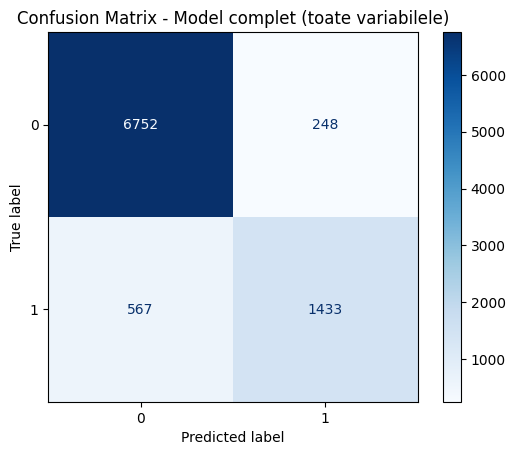

In [163]:
# Matricea de confuzie

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculăm matricea de confuzie
cm = confusion_matrix(y_test, y_pred_all, labels=tree_all.classes_)

# Afișăm matricea într-un mod grafic
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_all.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Model complet (toate variabilele)")
plt.show()

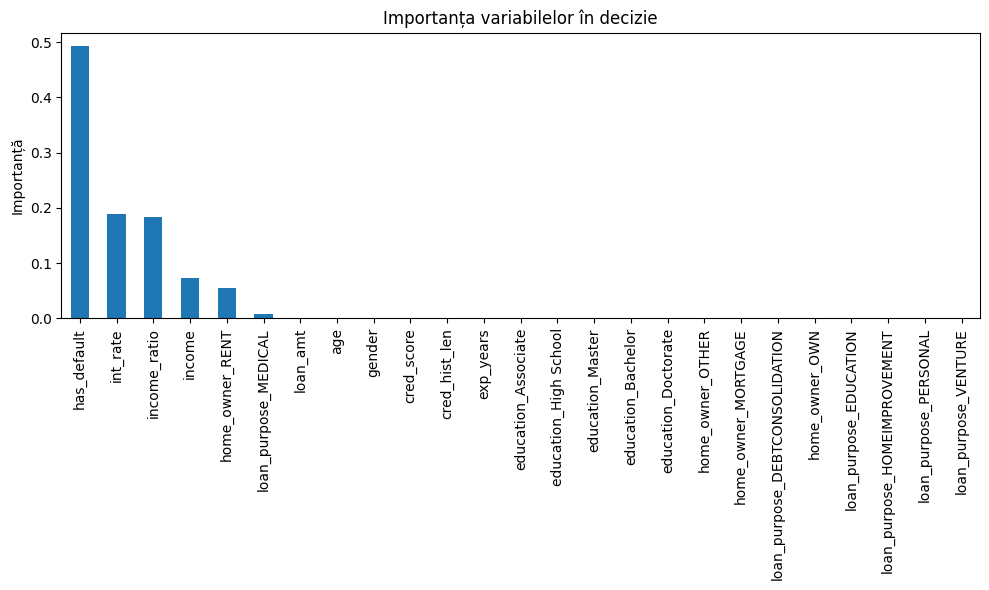

In [164]:
# Importanta Variabilelor explicata prin Bar Chart

importances = pd.Series(tree_all.feature_importances_, index=X_full.columns)
importances = importances.sort_values(ascending=False)

importances.plot(kind='bar', figsize=(10, 6), title='Importanța variabilelor în decizie')
plt.ylabel("Importanță")
plt.tight_layout()
plt.show()

Observăm că, spre deosebire de modelul de regresie logistică cel mai bun — unde variabila has_default s-a dovedit nesemnificativă din punct de vedere statistic, în cazul modelului bazat pe arbori decizionali, aceasta a avut cel mai ridicat grad de importanță în procesul de clasificare. Alături de has_default, au mai fost identificate încă patru variabile cu influență majoră în construcția modelului: int_rate, income_ratio, income  si home_owner_RENT.

####VIII. 2 Modelul cu cele mai importante 5 variabile

Mai departe, vom estima acelasi model folosind doar

In [165]:
# Selectam cele mai importante 5 variabile

top_features = ['has_default', 'int_rate', 'income_ratio', 'income', 'home_owner_RENT']
target = 'loan_status'

In [166]:
# Filtrăm coloanele dorite
X_top = df_ready[top_features]
y = df_ready[target]

# Eliminăm rândurile cu valori lipsă
mask = X_top.notnull().all(axis=1) & y.notnull()
X_top = X_top.loc[mask]
y = y.loc[mask]

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, stratify=y, random_state=42
)

In [168]:
from sklearn.tree import DecisionTreeClassifier

tree_top5 = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=10,
    random_state=42
)
tree_top5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

Acuratețe model cu 5 variabile importante: 0.9094

 Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7000
           1       0.85      0.72      0.78      2000

    accuracy                           0.91      9000
   macro avg       0.89      0.84      0.86      9000
weighted avg       0.91      0.91      0.91      9000



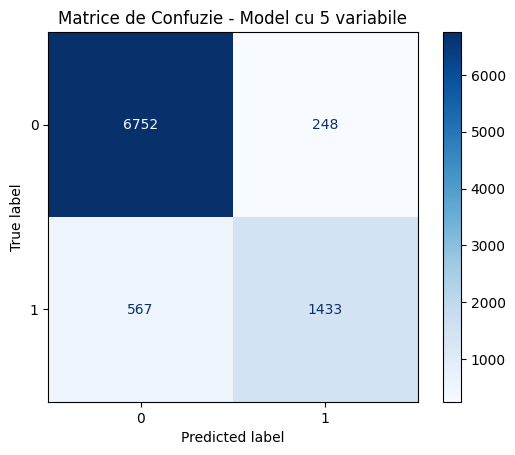

In [169]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_top5 = tree_top5.predict(X_test)

acc_top5 = accuracy_score(y_test, y_pred_top5)
print(f"Acuratețe model cu 5 variabile importante: {acc_top5:.4f}")

# Raport detaliat
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred_top5))

# Matrice de confuzie
cm = confusion_matrix(y_test, y_pred_top5, labels=tree_top5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_top5.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Matrice de Confuzie - Model cu 5 variabile")
plt.show()

Observăm că acuratețea modelului construit pe baza celor mai importante cinci variabile este identică cu cea a modelului complet, care a inclus toate variabilele disponibile. Acest lucru sugerează că restul variabilelor nu aduceau informație suplimentară relevantă pentru clasificare, iar modelul de tip arbore de decizie își poate menține performanța optimă folosind doar un subset restrâns, dar reprezentativ, de predictori.

Precision Clasa 0 = 92% dintre respingerile estimate sunt cu adevărat respingeri

Recall Clasa 0 = 96% dintre respingerile reale au fost detectate corect de model

Precision Clasa 1 = 85% dintre aprobările estimate sunt corecte

Recall Clasa 1 = 72% dintre aprobările reale au fost detectate corect de model


#IX. XGBoost

#### XGBoost cu top 5 variabile dupa importanta

In [170]:
!pip install xgboost

In [171]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Variabile importante
features = ['has_default', 'int_rate', 'income_ratio', 'income', 'home_owner_RENT']
target = 'loan_status'

# Set complet
X = df_ready[features]
y = df_ready[target]

# Eliminăm rândurile cu NaN
mask = X.notnull().all(axis=1) & y.notnull()
X = X.loc[mask]
y = y.loc[mask]

# Împărțire train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [172]:
model_xgb = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.15,
    subsample=0.7,
    colsample_bytree=0.7,
    min_child_weight=5,
    gamma=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model_xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:53:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.15, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [173]:
y_pred_xgb = model_xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Acuratețe model XGBoost: {acc_xgb:.4f}\n")

print(" Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))

Acuratețe model XGBoost: 0.9222

 Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7000
           1       0.86      0.78      0.82      2000

    accuracy                           0.92      9000
   macro avg       0.90      0.87      0.88      9000
weighted avg       0.92      0.92      0.92      9000



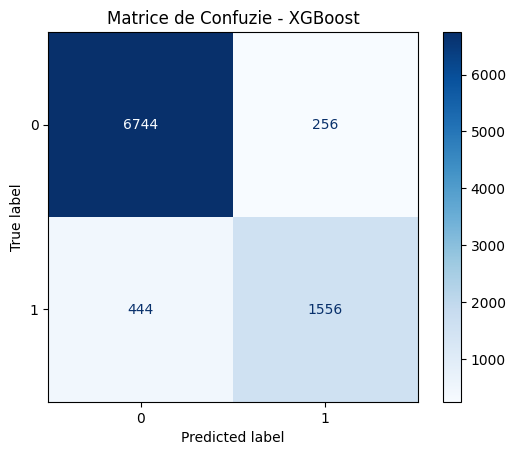

In [174]:
cm = confusion_matrix(y_test, y_pred_xgb, labels=model_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_xgb.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Matrice de Confuzie - XGBoost")
plt.show()

#### XGBoost + SMOTE

In [175]:
# Variabilele cele mai relevante
features = ['has_default', 'int_rate', 'income_ratio', 'income', 'home_owner_RENT']
target = 'loan_status'

# Pregătim X și y
X = df_ready[features]
y = df_ready[target]

# Eliminăm rândurile cu NaN
mask = X.notnull().all(axis=1) & y.notnull()
X = X.loc[mask]
y = y.loc[mask]

# Împărțire train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [176]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("Clasa după SMOTE:")
print(pd.Series(y_train_sm).value_counts())

Clasa după SMOTE:
loan_status
0    28000
1    28000
Name: count, dtype: int64


In [177]:
model_xgb_sm = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.15,
    subsample=0.7,
    colsample_bytree=0.7,
    min_child_weight=5,
    gamma=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model_xgb_sm.fit(X_train_sm, y_train_sm)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:53:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.15, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [178]:
y_pred_sm = model_xgb_sm.predict(X_test)

print(f"Acuratețe (SMOTE + XGBoost): {accuracy_score(y_test, y_pred_sm):.4f}")
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred_sm))

Acuratețe (SMOTE + XGBoost): 0.9028

 Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7000
           1       0.74      0.86      0.80      2000

    accuracy                           0.90      9000
   macro avg       0.85      0.89      0.87      9000
weighted avg       0.91      0.90      0.91      9000



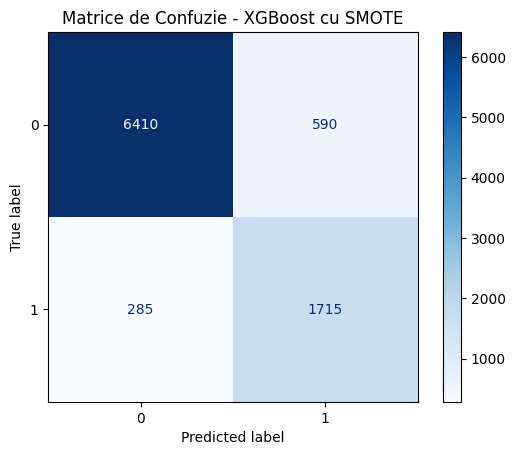

In [179]:
cm = confusion_matrix(y_test, y_pred_sm, labels=model_xgb_sm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_xgb_sm.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Matrice de Confuzie - XGBoost cu SMOTE")
plt.show()

Ajustare prin threshold

In [180]:
y_proba = model_xgb_sm.predict_proba(X_test)[:, 1]

# Ajustăm threshold-ul (ex: 0.6 în loc de 0.5)
threshold = 0.62
y_pred_adj = (y_proba >= threshold).astype(int)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7000
           1       0.81      0.80      0.81      2000

    accuracy                           0.91      9000
   macro avg       0.88      0.87      0.88      9000
weighted avg       0.91      0.91      0.91      9000



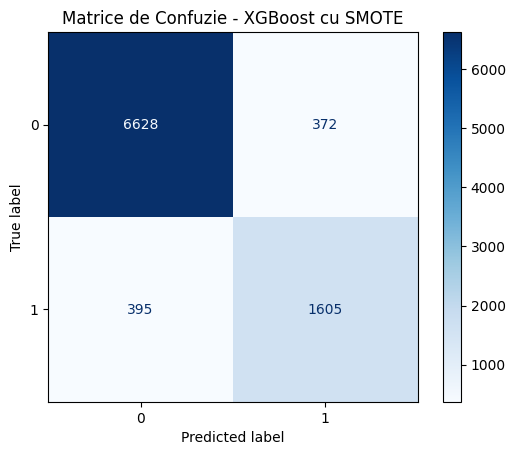

In [181]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_adj))
cm = confusion_matrix(y_test, y_pred_adj)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_xgb_sm.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Matrice de Confuzie - XGBoost cu SMOTE")
plt.show()

# X. Concluzii

În urma modelelor estimate construite cu ajutorul a 3 algoritmi de invatare supervizata, putem observa faptul ca cel mai performant model din punct de vedere al acurateții per total (de 92.22%) este XGBoost cu cele mai importante 5 variabile ca și impact asupra variabile target (loan_status), însă ultimul model XGBoost, deși prezintă o acuratețe ușor mai scăzută (91.48%), clasifică mai bine persoanele din baza de date cărora le-a fost acceptată cererea pentru credit bancar.

Cu toate că XGBoost prezintă cea mai mare acuratețe, interpretabilitatea modului în care fiecare variabila influențează target-ul este redusă, din acest punct de vedere fiind preferate modelele estimate prin intermediul primilor doi algoritmi utilizați în analiză.